In [1]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib as mpl
import matplotlib.pyplot as plt




In [103]:
FEE_AL_910 = pd.read_excel("/Users/moyinolorunadegbie/Documents/SOURCE ROCK PLOTS/KEROGEN.xlsx",sheet_name="FEE_AL")
FEE_BI_307 = pd.read_excel("/Users/moyinolorunadegbie/Documents/SOURCE ROCK PLOTS/KEROGEN.xlsx",sheet_name="FEE_BI")
FEE_AW_3402 = pd.read_excel("/Users/moyinolorunadegbie/Documents/SOURCE ROCK PLOTS/KEROGEN.xlsx",sheet_name="FEE_AW")


FEE_AL_910 = pd.read_excel("/Users/moyinolorunadegbie/Downloads/KEROGEN_NEW.xlsx",sheet_name="FEE_AL")
FEE_BI_307 = pd.read_excel("/Users/moyinolorunadegbie/Downloads/KEROGEN_NEW.xlsx",sheet_name="FEE_BI")
FEE_AW_3402 = pd.read_excel("/Users/moyinolorunadegbie/Downloads/KEROGEN_NEW.xlsx",sheet_name="FEE_AW")






In [104]:
FEE_AL_910N  = FEE_AL_910
FEE_BI_307N  = FEE_BI_307
FEE_AW_3402N = FEE_AW_3402

FEE_AL_910 = replace(FEE_AL_910N)
FEE_BI_307 = replace(FEE_BI_307N)
FEE_AW_3402 = replace(FEE_AW_3402N)

In [105]:
def convert(FEE_AL_910):
    dataframe = FEE_AL_910
    FEE_AL_910_ = FEE_AL_910[['Depth','TOC','Calcite']]
    FEE_AL_910_[['Depth','TOC','Calcite']] = FEE_AL_910[['Depth','TOC','Calcite']].astype(int)
   
    FEE_AL_910_L = FEE_AL_910_[['Depth','TOC', 'Calcite']].values.tolist()
    FEE_AL_910_L[0].insert(0,0)   # left index       right value
    for i in range(1,len(FEE_AL_910_L)):
        FEE_AL_910_L[i].insert(0,   int(FEE_AL_910_L[i-1][1]) )
        
    return FEE_AL_910_L, FEE_AL_910, dataframe

In [106]:
FEE_AW_3402['TOC']

FEE_AW_3402['Pseudo Van Krevelen Plot']

FEE_AW_3402['Kerogen Quality Plot']

FEE_AW_3402['Kerogen Type and Maturity']

FEE_AW_3402['Kerogen Conversion and Maturity']




0     Oil zone
1     Oil zone
2     Immature
3     Oil zone
4     Oil zone
5     Oil zone
6     Oil zone
7     Oil zone
8     Oil zone
9     Oil zone
10    Oil zone
11    Oil zone
12    Oil zone
13    Oil zone
14    Oil zone
15    Oil zone
16    Oil zone
17    Oil zone
18    Oil zone
19    Oil zone
20    Oil zone
21    Oil zone
22    Oil zone
23    Oil zone
Name: Kerogen Conversion and Maturity, dtype: object

In [184]:
from collections import defaultdict
import statistics

#####################################################################################################################

def convert(FEE_AL_910):
    
    
    dataframe = FEE_AL_910
    
    FEE_AL_910_ = FEE_AL_910[['Depth','TOC','Calcite']]
    FEE_AL_910_[['Depth','TOC','Calcite']] = FEE_AL_910[['Depth','TOC','Calcite']].astype(int)
   
    FEE_AL_910_L = FEE_AL_910_[['Depth','TOC', 'Calcite']].values.tolist()
    FEE_AL_910_L[0].insert(0,0)   # left index       right value
    for i in range(1,len(FEE_AL_910_L)):
        FEE_AL_910_L[i].insert(0,   int(FEE_AL_910_L[i-1][1]) )
        
    return FEE_AL_910_L, FEE_AL_910  ,   dataframe

#####################################################################################################################

def transpose(l1, l2):
    l2 =[[row[i] for row in l1] for i in range(len(l1[0]))]
    return l2

#####################################################################################################################

def minOperationsQueries(edges, queries):
    n = len(edges) +1
    def dfs( p, x, t, b, e, w, w2, f, all , all2):
        all[x][::] = w[::]
        all2[x][::] = w2[::]
        f[x][0] = p
        b[x] = t[0] = t[0] + 1
        for y in adj[x]: 
            if y[0] != p:
                w[ y[0] ] += y[1]
                w2[ y[0] ] += y[2]
                dfs(x, y[0], t, b, e, w, w2,  f, all, all2 )
                w2[ y[0] ] -=y[2]
                w[ y[0] ] -= y[1]
        e[x]  = t[0]
    def ancestor(x, y, b, e):
        return b[x]  <= b[y] and e[x]  >= e[y]
    def lcs(x, y, b, e, f):
        if  ancestor(x, y, b, e):
            return x
        if  ancestor(y, x, b, e):
            return y
        r = 0
        for i in range(n-1,-1,-1):
            temp = f[x][i]
            if ancestor(temp, y, b, e):
                r = temp
            else:
                x = temp
        return r
    adj = defaultdict(list)
    graph = {}
    graph2 = {}
    cnnn = 0
    for e in edges:
        adj[cnnn].append((cnnn+1, e[2],e[3]))
        graph[e[1] ] = cnnn+1
        graph2[cnnn+1] = e[1]
        cnnn += 1
    f = [[0]*(n) for _ in range(n)]
    all = [[0]*(n) for _ in range(n)] # # TOC
    all2 = [[0]*(n) for _ in range(n)] # CARBONATE
    b = [0] * (n)
    e = [0] * (n)
    w = [0] *  n #(tc+1) # TOC
    w2 = [0] *  n #(carb+1) # CARBONATE
    t = [0]
    dfs(-1, 0, t, b, e, w, w2, f, all, all2 )
    f[0][0] = 0
    for j in range(1,n):
        for i in range(n):
            f[i][j] =  f[  f[i][j-1] ][j-1]
    ans = []
    ans2 = []
    
    medianans = []
    for q  in queries:
        if q[0] == q[1]:
            continue
        tocmedians = []
        tocmedians.append( adj[   graph[ q[0] ]-1  ][0][1]  ) 
        #print(tocmedians)
        carbmedians = []
        carbmedians.append( adj[   graph[ q[0] ]-1  ][0][2] )
        #print(carbmedians)
        summ = 0
        summm = 0
        tlc = lcs( graph[ q[0]],   graph[ q[1]], b, e, f)
        tot = graph[ q[1]] - graph[ q[0]] +1  
        for i in range(n):  # TOC
            temp = all[  graph[ q[0] ] ][i]  +  all[  graph[ q[1] ] ][i]  - ( all[  graph[ graph2[tlc] ]   ][i] << 1 )
            summ += temp     # CARB
            
                
            temp2 =  all2[  graph[ q[0] ] ][i]  +  all2[  graph[ q[1] ] ][i]  - ( all2[  graph[ graph2[tlc] ]   ][i] << 1 )    
            summm += temp2
            if graph[ q[0]] < i <= graph[ q[1]]  :
                tocmedians.append(temp) # PATH
                #print(tocmedians  )
                #print(statistics.median(tocmedians) ,'TOC' )
                
                carbmedians.append(temp2) # # PATH
                #print(carbmedians  )
                #print(statistics.median(carbmedians) , 'CARB' )
                
                term = [statistics.median(tocmedians) ,    statistics.median(carbmedians) ]
        #print( tocmedians   )   # PATH
        #print(  carbmedians   )  #  PATH
        medianans.append(term)
        ans.append((summ + adj[   graph[ q[0] ]-1  ][0][1] )/ tot)
        ans2.append((summm + adj[   graph[ q[0] ]-1  ][0][2] )/ tot)
        #if len( tocmedians ) == tot and len( carbmedians ) == tot:
        #print( tocmedians )
       # print()
        #print( carbmedians )
    
    l1 = []
    #transpose(medianans , l1)
    #print(transpose(medianans , l1), 'TOC & Carbonate medianans')
    #print(medianans)
    l2 = []
    transpose([ans, ans2], l2)
    return transpose([ans, ans2], l2),  medianans

#####################################################################################################################

def quary(FEE_AL_910, quaries):
    graph = defaultdict(list)
    graphtoc = {}
    graphcarbonate = {}
    for u, v , toc , carbonate in FEE_AL_910 :
        graph[u].append(v)
        graphtoc[v] = toc
        graphcarbonate[v] = carbonate
    def dfs(start, stop, sumtoc,sumcarbonate , cnt):
        seen.add(start)
        tocpath.append(graphtoc[start])
        carbonatepath.append(graphcarbonate[start])
        sumtoc += graphtoc[start]
        sumcarbonate += graphcarbonate[start]
        cnt += 1
        for v in graph[start]:      #print( sumtoc / cnt , sumcarbonate / cnt,'     sumtoc / cnt , sumcarbonate / cnt     ' ,sumtoc,sumcarbonate, cnt)
            if v not in seen and start < v   :
                if v == stop:
                    sumtoc += graphtoc[v]
                    sumcarbonate += graphcarbonate[v]
                    cnt += 1
                    tocpath.append(graphtoc[v])
                    carbonatepath.append(graphcarbonate[v])
                    
                    ans.append([sumtoc / cnt , sumcarbonate / cnt]) 
                    #print(tocpath)
                    #print(carbonatepath)
                    tocmedian.append(statistics.median(tocpath))
                    carbonatemedian.append(statistics.median(carbonatepath))
                    median.append([statistics.median(tocpath), statistics.median(carbonatepath)  ])
                dfs(v , stop, sumtoc,sumcarbonate , cnt )
    ans = []
    tocmedian = []
    carbonatemedian = []
    median = []
    
    for start, stop in quaries:  ## ([29, 54, 13], [63, 205, 40])
        sumtoc = 0
        sumcarbonate = 0
        cnt = 0
        seen = set()
        tocpath = []
        carbonatepath = []
        
        dfs(start, stop, sumtoc, sumcarbonate, cnt)
    #print(tocmedian,'TOCmedian')
    #print()
    #print( carbonatemedian , 'Carbonatemedian' )
    #print()
    #print(median)
    return ans, median

#####################################################################################################################

def checking( well ,  quaries, formationZZZ, SEQUENCE):
    
    #(convert(FEE_AL_910)[0]
    #(convert(FEE_AL_910)[1]
    FEE_AL_910 = well[1]
    FEE_AL_910_ = well[0]
    
    well3 = well[2]
    
    well3  =   well3[['Depth',
                              'Kerogen Conversion and Maturity' ,   #  WATCH OUT FOR ARRANGEMENTS !!!
                       'Kerogen Type and Maturity',
               'Kerogen Quality Plot',
          'Pseudo Van Krevelen Plot'
         
         ]]
    def transpose(  well3  ):  
        NEW  =   well3[[  'Depth',
  
              'Kerogen Conversion and Maturity' ,   #  WATCH OUT FOR ARRANGEMENTS !!!
                       'Kerogen Type and Maturity',
               'Kerogen Quality Plot',
          'Pseudo Van Krevelen Plot']]      ### ARRANGE / CHOOSE TO TASTE 
    
        B = [ NEW[i].tolist() for i in list(NEW)   ]
        rez = [[B[j][i] for j in range(len(B))] for i in range(len(B[0]))]  ## TRANSPOSE
        return  rez
    #print(well3,"hheerree")
    #print(   transpose(  well3  ) )
    
    #serg = transpose(  well3  )
    
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax1 = plt.subplots(figsize=(3, 15))
    plt.ylabel("Depth ft")
    lis = list(  range( len(FEE_AL_910['Depth'] )     )     )   
    dep = FEE_AL_910['Depth'].astype(int).tolist()


    gar =  defaultdict(list)
    for i in range(len(lis)):
        gar[ dep[i] ].append(  lis[i]  )

#print(gar)
#print(lis,dep)
    ax1.plot(FEE_AL_910['TOC'].tolist(), lis, label= 'TOC',color='tomato',marker='o' )
#plt.xticks(np.arange(0, 15, 5))
#fig.tight_layout(pad=200)

## mask  = FEE_AL_910['Calcite'] != 8400
 
#ax2 = ax1.twiny()      
    ax2 = ax1.twiny()
    ax2.plot( FEE_AL_910['Calcite'].tolist()  , lis , label= 'Calcite', color='lightskyblue',marker='P')
    ax2.set_title("% Carbonate")


    plt.yticks( dep )

    plt.xlabel("TOC (wt%)")
    plt.ylim(max(lis)+2, min(lis)-2)
    ax2.xaxis.set_label_position('bottom')
    ax2.xaxis.set_label_coords(0.5,-0.05)
    plt.grid()     
    ax2.legend(loc = 'upper right')
    ax1.legend(loc = 'lower right')
#ax1.legend(loc = 'lower left')
    ax1.grid()   
    ax2.grid()


    ax1.set_yticks(lis)
    ax2.set_yticks(lis)
    
    dep = FEE_AL_910['Depth'].astype(float).tolist()

    ax1.set_yticklabels(dep)
    ax2.set_yticklabels(dep)

    
    
    
    
    import random
    import json
    
    
    def vin(rslt_df, grph, serg):
        temp = serg
        serg = [ i[1:] for i in serg ]
        #print(serg)
        
        from collections import defaultdict
        adj = defaultdict(list)
        
        matt = []
        
        for i in temp:
            adj[   tuple( i[1:])].append( str(i[0])  )
        #print(adj)
        #print(serg)
        #print( 'MAIN. ', main(rslt_df) , 'MAIN')
        for i  in  range(1):
            i_ = main(rslt_df)[i]  
            ii_ = main(rslt_df)[i+1]
                    #print(i_)
                    #print()
                    #print()
            #print(ii_,'here----')
            cv = 0
            for row in range(  len(   main(rslt_df)[i+1]   )    ):
                i__ = i_[row]
                ii__ = ii_[row]
                #print(i__)
                        #print()
                        #print()
                #print(tuple( ii__)  )
                        #ii___ = tuple( ii__) 
               # print()    
                        #if not isinstance(ii__, tuple) :
                            #continue
                    #print( i[1])
                #print(ii__,"herre",  isinstance(ii__, tuple),"    ",row)
                        #grph = {}
                    
                #print(ii_, ii__ )
                #print(ii__ )
                if i__ in serg:
                    #print(ii__, len(ii__), type(ii__[-1]))
                    
                    alll = ""
                    for jj in ii__ :
                        
                        alll += jj
                        alll+='\n'
                        alll+=""
                        asd = "("
                        cnb = 0
                        for hj in tuple(adj[ tuple(i__ ) ] )   :
                            cnb+=1
                            if cnb < len(tuple(adj[ tuple(i__ ) ] ) ):
                                asd += hj + "ft, "
                            else:
                                asd += hj + "ft)" 
                        #print(asd)
                   #print(len(tuple(adj[ tuple(i__ ) ] )))
                    if len(tuple(adj[ tuple(i__ ) ] )) == 1 :
                        alll += str( serg.count(i__) ) + " sample about "+    str(   round((  (serg.count(i__)/len(serg) ) * 100) , 2)  ) + "% of the interval at depth " +  asd #str(  tuple([ h + "ft" for h in tuple(adj[ tuple(i__ ) ] ) ])   )
                        alll+='\n' +  '\n' 
                    #print(alll)
                    if len(tuple(adj[ tuple(i__ ) ] )) > 1 :
                        alll += str( serg.count(i__) ) + " samples about "+    str(   round((  (serg.count(i__)/len(serg) ) * 100) , 2)  ) + "% of the interval at depths " +  asd #str(  tuple([ h + "ft" for h in tuple(adj[ tuple(i__ ) ] ) ])   )
                        alll+='\n' +  '\n'
                    
                    if alll not in matt:
                        matt.append(alll)
                    grph[ str(ii__) ]  =  "   "+ str( serg.count(i__) ) + " samples about "+    str(   round((  (serg.count(i__)/len(serg) ) * 100) , 2)  ) + "% of the interval at depths " +  str(  tuple([ h + " ft" for h in tuple(adj[ tuple(i__ ) ] ) ])   ) #str(tuple(adj[ tuple(i__ ) ] )    )                
                    #print(ii__ ,type(ii__) ,'here-----')
                    #print(tuple(adj[ tuple(i__ ) ] )  , tuple([ h + "ft" for h in tuple(adj[ tuple(i__ ) ] ) ]) )

                    
                #grph[ ii__ ]  =  "   "+ str( serg.count(i__) ) + "  "+    str( (  (serg.count(i__)/len(serg) ) * 100)   ) + "%"                      
                #cv+=1
                
        print(u, "-",v," ft")
        print()
        print(SEQUENCE[ (u, v)  ], fm ) 
        print()
        for at in matt :
            print(at)#, end=" ")
        print()
                
        return grph   
#######


    
    number_of_colors = len( quaries )

    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    #print(color)

    formations = {}
  
    cnt= 0
    for u, v in quaries:
       # print(u, v)
        #from matplotlib import image as mpimg
        #image = mpimg.imread("/Users/moyinolorunadegbie/Documents/SEQUEN/FALLING_SEA.png") 
        #plt.imshow(image)
        
        #rangg = [u, v]
        rslt_df = well3.loc[(well3['Depth'] >= u-1) & (well3['Depth'] <= v+1 ) ]
        #print(rslt_df, " hereg")
        grph = {}
        em = ''
        
        serg = transpose(  rslt_df  )
        #print(  serg  ,"oo")
        
        # ph = vin(rslt_df, grph, serg) # <<<<<<<<
        
        
        #print()
        #print("^^^^^^^^^^^^^")
        #for k in ph.keys():
            #print( k, type(k), len(k) )
        #print("VVVVVVVVVVVVVV")
        #print()
        
        #print(ph,"jere", type(ph))
        fm =""
        for key, value in formationZZZ.items():
            #grph = {}
            if  value[0] <= u  <=  value[1]  and value[0] <= v  <=  value[1] :
                fm += key
                
                
                
                #print( main(rslt_df)[0])
                
                
                em = key 
        rangg = [gar[u][0], gar[v][0]  ] 
        #rang = '                                       '+str(u)+' ft to '+str(v)+' ft : AVG TOC of '+ str( quary( FEE_AL_910_  , quaries)[0][cnt][0] )+ ', Median TOC of '+ str( quary( FEE_AL_910_  , quaries)[1][cnt][0] ) +  ',     AVG Carbonate of ' + str( quary( FEE_AL_910_  , quaries)[0][cnt][1]  )  +', Median Carbonate of ' + str( quary( FEE_AL_910_  , quaries)[1][cnt][1]  ) 
        if em != '' :
            #print(ph, 'lere')
            rang = em +"\n" + 'AVG TOC of '+str( round(quary( FEE_AL_910_  , quaries)[0][cnt][0] , 3 ))+ "\n"+'Median TOC of '+ str( round(quary( FEE_AL_910_  , quaries)[1][cnt][0] , 3 )) + "\n"+  'AVG Carbonate of ' + str( round(quary( FEE_AL_910_  , quaries)[0][cnt][1], 3 ) )+"\n"  +'Median Carbonate of ' + str( round(quary( FEE_AL_910_  , quaries)[1][cnt][1] , 3) ) +"\n"+SEQUENCE[ (u, v)  ]         # +       json.dumps(ph) 

        
        ph = vin(rslt_df, grph, serg)
        #print(  rang)  #  string label
       # print()
    #print( rangg)  # list of quary range
    #print(   '', minOperationsQueries( FEE_AL_910  , quaries)[cnt][0]  , minOperationsQueries( FEE_AL_910  , quaries)[cnt][1] )
        cnt+=1
        
        #rang +=  str(json.dumps(ph) )
        #print(ph, type(ph))
        
        #print(ph)
        
        #for k, v in ph.items():
           # print(  k, v )
        
        
        ph = str(ph)
        
                
        #print(u, "-",v," ft")
        #print(SEQUENCE[ (u, v)  ], fm )
        #print()
        print(ph )
        
        print()
        #print()
        print("#####################################################################")
        #print(ph, type(ph))    #    (  rang + ph )
        # ph    rang
        formations[  rang  ] = rangg
    
    #print(formations)

    
    zone_colours = color
    
    

    for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        ax2.axhspan(depth[0], depth[1] , color=colour, alpha=0.2)
        
        
    formation_midpoints = []
    for key, value in formations.items():
        
        formation_midpoints.append(value[0] + (value[1]-value[0])/2)
    
#formation_midpoints  # rotation=90   # 95
        
    for label, formation_mid in zip(formations.keys(), 
                     # 94.5  10           
                                    formation_midpoints):
            ax2.text(21, formation_mid,  label , rotation=0,  # 28
                verticalalignment='center', #fontweight='bold',
                fontsize= 7)# 7    ) # 'large')
            
            
  
   


    plt.show()
    
# Progradational Sequence,
# Retrogradational Sequence,
# Aggradational Sequence,
 

# FEE AL DEPOSITIONAL MODEL

FEE_AL_910
9341 - 9370  ft

Retrogradational Sequence, Basal Lower Spraberry (Leonardian)

Kerogen Conversion and Maturity : Oil zone
Kerogen Type and Maturity : Type II/III Kerogen
Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)
Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)
4 samples about 100.0% of the interval at depths (9341.5ft, 9350.5ft, 9360.0ft, 9370.0ft)



{"('Kerogen Conversion and Maturity : Oil zone', 'Kerogen Type and Maturity : Type II/III Kerogen', 'Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)', 'Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)')": "   4 samples about 100.0% of the interval at depths ('9341.5 ft', '9350.5 ft', '9360.0 ft', '9370.0 ft')"}

#####################################################################
9861 - 9918  ft

Progradational Sequence, Upper Wolfcamp Carbonate Member

Kerogen Conversion and Maturity : Oil zone
Kerogen Type and Maturity : Type II/III Kerogen
Kero

/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_90942/2593851749.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FEE_AL_910_[['Depth','TOC','Calcite']] = FEE_AL_910[['Depth','TOC','Calcite']].astype(int)


10622 - 10652  ft

Progradational Sequence, Lower Cline

Kerogen Conversion and Maturity : Oil zone
Kerogen Type and Maturity : Type II/III Kerogen
Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)
Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)
4 samples about 100.0% of the interval at depths (10622.5ft, 10632.5ft, 10641.0ft, 10652.5ft)



{"('Kerogen Conversion and Maturity : Oil zone', 'Kerogen Type and Maturity : Type II/III Kerogen', 'Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)', 'Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)')": "   4 samples about 100.0% of the interval at depths ('10622.5 ft', '10632.5 ft', '10641.0 ft', '10652.5 ft')"}

#####################################################################
10673 - 10702  ft

Progradational Sequence, Lower Cline

Kerogen Conversion and Maturity : Oil zone
Kerogen Type and Maturity : Type II/III Kerogen
Kerogen Quality Plot : Mixed Type II/III Kerogen

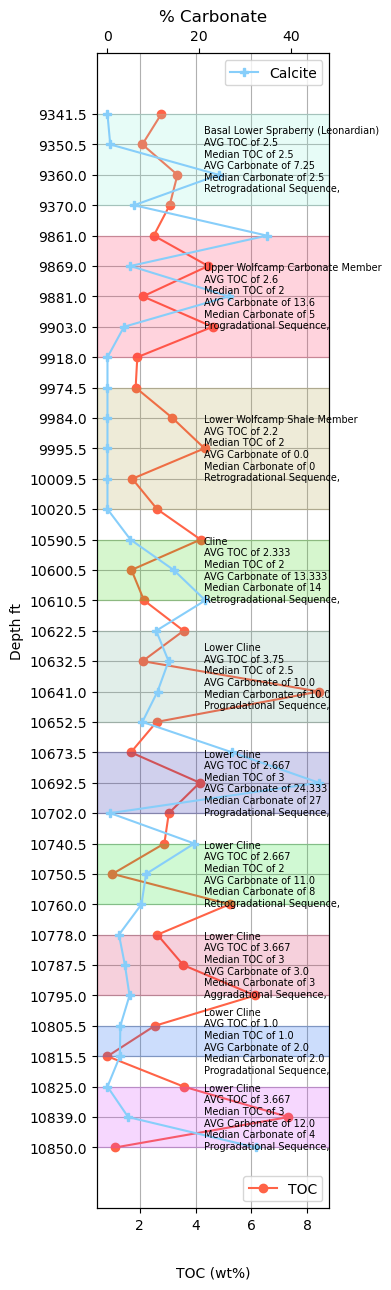

In [185]:

SEQUENCE1 = {  ( 9341,9370  ) :    "Retrogradational Sequence," ,

( 9861,9918 ) :     "Progradational Sequence,"  ,
 
( 9974, 10020) :     "Retrogradational Sequence,"  ,  ######
             
             
             


( 10590, 10610 ) :    "Retrogradational Sequence," ,
             
   
( 10622, 10652 )  :  "Progradational Sequence,"  ,
             
             
(10673, 10702) : "Progradational Sequence,"  ,
             
             
(10740, 10760) :  "Retrogradational Sequence," ,
             
             
( 10778, 10795 ) : "Aggradational Sequence," ,
             
             
(10805, 10815 ) :  "Progradational Sequence,"  ,
             
( 10825, 10850  ) :  "Progradational Sequence,"  }




formationWell1 = { #"Upper Leonard Shale" : [8040,8083],
 "Basal Lower Spraberry (Leonardian)":[9341,9370] ,
"Upper Wolfcamp Carbonate Member" : [9861,9918] ,    #. 10
"Lower Wolfcamp Shale Member" : [9974, 10020],
    
    ###########
"Cline": [10590, 10610 ],
 "Lower Cline": [10622, 10652 ],
     "Lower Cline": [10673, 10702 ], 
     "Lower Cline": [10740, 10760 ], 
     "Lower Cline": [10778, 10795 ], 
     "Lower Cline": [10805, 10815 ],
    "Lower Cline": [10825, 10850 ] ,  
    
      "Lower Cline": [10622, 10850 ]  
  }  ######



################# 

well1 = [ [9341,9370]  ,  [9861,9918]   ,  [9974, 10020] ,         [10590, 10610 ] , 
        [10622, 10652 ] , [10673, 10702 ]  , [10740, 10760 ] , [10778, 10795 ],  [10805, 10815 ], [10825, 10850 ]   ]

                   


#################

print('FEE_AL_910')    #.  9300. 10900

checking( convert(FEE_AL_910) ,  well1, formationWell1, SEQUENCE1 ) 






# FEE BI 307 DEPOSITIONAL MODEL

FEE_BI_307
9037 - 9487  ft

Progradational Sequence, Lower Spraberry/Dean Limestone

Kerogen Conversion and Maturity : Condensate wet gas zone
Kerogen Type and Maturity : Type I Kerogen
Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)
Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)
1 sample about 11.11% of the interval at depth (9487.0ft)


Kerogen Conversion and Maturity : Oil zone
Kerogen Type and Maturity : Type II/III Kerogen
Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)
Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)
5 samples about 55.56% of the interval at depths (9037.0ft, 9078.5ft, 9127.5ft, 9333.5ft, 9371.5ft)


Kerogen Conversion and Maturity : Oil zone
Kerogen Type and Maturity : Type III Kerogen
Kerogen Quality Plot : Type III Kerogen (gas prone)
Pseudo Van Krevelen Plot : Type III Kerogen (gas prone)
3 samples about 33.33% of the interval at depths (9142.0ft, 9218.0ft, 9398.0ft)



{"('Kerogen Co

/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_90942/2593851749.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FEE_AL_910_[['Depth','TOC','Calcite']] = FEE_AL_910[['Depth','TOC','Calcite']].astype(int)


9938 - 10166  ft

Retrogradational Sequence, Lower Wolfcamp

Kerogen Conversion and Maturity : Condensate wet gas zone
Kerogen Type and Maturity : Type I Kerogen
Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)
Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)
9 samples about 50.0% of the interval at depths (9956.5ft, 9966.5ft, 9975.5ft, 9980.5ft, 9985.5ft, 9990.5ft, 10000.5ft, 10004.5ft, 10010.5ft)


Kerogen Conversion and Maturity : Oil zone
Kerogen Type and Maturity : Type II/III Kerogen
Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)
Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)
7 samples about 38.89% of the interval at depths (9952.5ft, 9962.5ft, 9972.5ft, 9995.5ft, 10026.5ft, 10032.5ft, 10166.5ft)


Kerogen Conversion and Maturity : Condensate wet gas zone
Kerogen Type and Maturity : Type II/III Kerogen
Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)
Pseudo Van Krevelen Plot : Mixed Type I

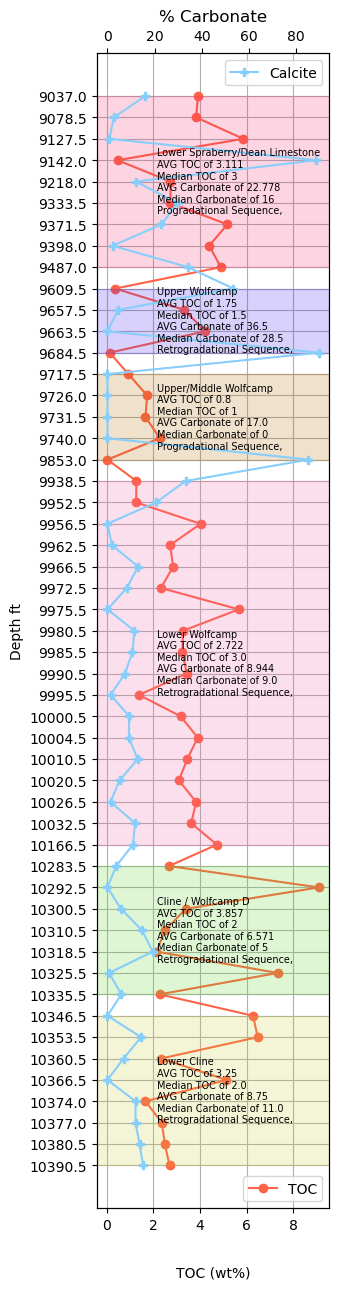

In [186]:
# Progradational Sequence,
# Retrogradational Sequence,
# Aggradational Sequence,


SEQUENCE2 = {  

    
(9037, 9487) :     "Progradational Sequence,"   , 
(9609, 9684) :      "Retrogradational Sequence," ,
(9717, 9853) :       "Progradational Sequence,"   , 
(9938, 10166) :      "Retrogradational Sequence," ,
    
    

(10283, 10335) :      "Retrogradational Sequence," ,
(10346 , 10390) :      "Retrogradational Sequence,"
}


# "Spraberry" : [8285 ,9333], # old
 
formationWell2 = {                  
"Lower Spraberry/Dean Limestone" : [9037, 9487],   # ret
"Upper Wolfcamp" : [9609, 9684] , 
"Upper/Middle Wolfcamp" : [9717, 9853]  ,
"Lower Wolfcamp" : [9938, 10166]  , 
    
    
"Cline / Wolfcamp D" : [10283, 10335]  ,
"Lower Cline" : [ 10346 , 10390]  ,

}




        
well2 = [ [9037, 9487]  , [9609, 9684]   , [9717, 9853] ,  [9938, 10166]   ,  [10283, 10335] ,   [ 10346 , 10390] ]   
        
##################

print('FEE_BI_307')    #.  9036.  10500

checking( convert(FEE_BI_307) ,  well2, formationWell2, SEQUENCE2 ) 



  
# "PERMIAN":[9037,10283] 
# "PENNSYLVANIAN":[10283,11022]  

In [187]:
# FEE AW 3402 DEPOSITIONAL MODEL

FEE_AW_3402


/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_90942/2593851749.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FEE_AL_910_[['Depth','TOC','Calcite']] = FEE_AL_910[['Depth','TOC','Calcite']].astype(int)


9161 - 9644  ft

Progradational Sequence, Lower Spraberry Limestone

Kerogen Conversion and Maturity : Oil zone
Kerogen Type and Maturity : Type II/III Kerogen
Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)
Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)
3 samples about 75.0% of the interval at depths (9161ft, 9297ft, 9644ft)


Kerogen Conversion and Maturity : Immature
Kerogen Type and Maturity : Type III Kerogen
Kerogen Quality Plot : Type III Kerogen (gas prone)
Pseudo Van Krevelen Plot : Type III Kerogen (gas prone)
1 sample about 25.0% of the interval at depth (9520ft)



{"('Kerogen Conversion and Maturity : Oil zone', 'Kerogen Type and Maturity : Type II/III Kerogen', 'Kerogen Quality Plot : Mixed Type II/III Kerogen (oil/gas prone)', 'Pseudo Van Krevelen Plot : Mixed Type II/III Kerogen (oil/gas prone)')": "   3 samples about 75.0% of the interval at depths ('9161 ft', '9297 ft', '9644 ft')", "('Kerogen Conversion and Maturity : Immature',

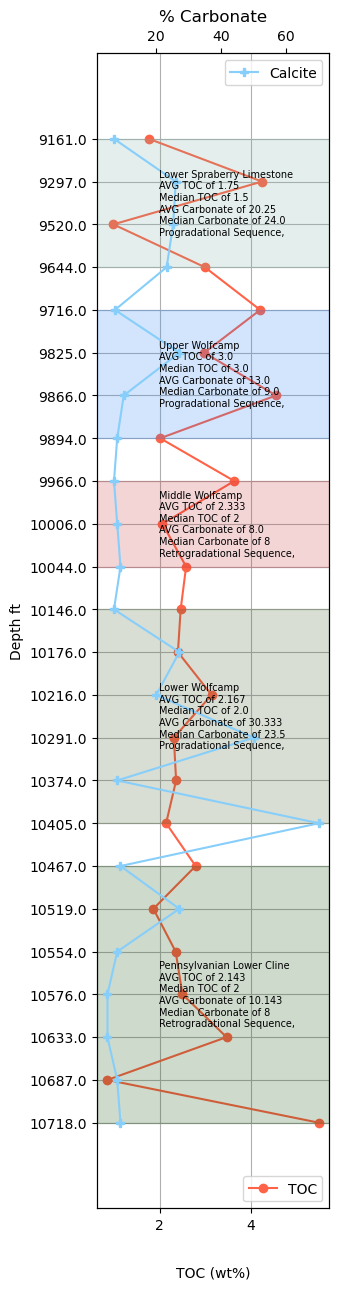

In [188]:
FEE_AW_3402.iloc[5::,0::]

# sandstone/clastics = low stands
# shale/limestone = high stands

# [9161, 9716 ]     "PROGRADATIONAL/COARSENING UPWARD/REGRESSIVE" 

# [9716, 10006]     "RETROGRADATIONAL/FINING UPWARD/TRANSGRESSIVE"
 
# [10006, 10291]    "PROGRADATIONAL/COARSENING UPWARD/REGRESSIVE" 

# [10291, 10374]    "RETROGRADATIONAL/FINING UPWARD/TRANSGRESSIVE"
   
# [10374, 10718]    "PROGRADATIONAL/COARSENING UPWARD/REGRESSIVE" 



#SEQUENCE3summary = {  (9161, 9716 ) :    "PROGRADATIONAL/COARSENING UPWARD/REGRESSIVE"  ,

#(9716, 10006) :     "RETROGRADATIONAL/FINING UPWARD/TRANSGRESSIVE"  ,
 
#(10006, 10291) :    "PROGRADATIONAL/COARSENING UPWARD/REGRESSIVE" ,

#(10291, 10374) :    "RETROGRADATIONAL/FINING UPWARD/TRANSGRESSIVE"  ,
   
#(10374, 10718)  :    "PROGRADATIONAL/COARSENING UPWARD/REGRESSIVE"  }




#formationWell3 = { "PERMIAN":[9161,10718] }



#well3summary = [ [9161, 9716 ]  , [9716, 10006]   , [10006, 10291]  ,  [10291, 10374]   ,  [10374, 10718]  ]


print('FEE_AW_3402')    # 9160. 10719

# Progradational Sequence,
# Retrogradational Sequence,
# Aggradational Sequence,



SEQUENCE3summary = {  #(7759, 8161 ) :    "PROGRADATIONAL/COARSENING UPWARD/REGRESSIVE"  ,
                    #(8230, 9161) :     "RETROGRADATIONAL/FINING UPWARD/TRANSGRESSIVE"  ,
                    (9161, 9644) :  "Progradational Sequence,"    ,      #######
                   # (9265, 9588) : "PROGRADATIONAL/COARSENING UPWARD/REGRESSIVE"  ,
                    (9716, 9894) :  "Progradational Sequence,"  ,
    
                   
                    (9966, 10044) :  "Retrogradational Sequence,"  ,
                    (10146, 10405)  :  "Progradational Sequence,"  ,
                    (10467, 10718)  :   "Retrogradational Sequence,"   }

formationWell3 = { #"Basinal Sands":[7759, 8161 ],
                  #"Spraberry": [8230, 9161] ,
                   #"Lower Spraberry Limestone" : [9265, 9588], 
                  #"Dean Limestone" : [9644, 9675],
                  "Upper Wolfcamp" : [9716, 9894],
                  "Middle Wolfcamp" : [9966, 10044],    # 8
                  "Lower Wolfcamp" : [10146, 10405],
                   "Pennsylvanian Lower Cline" : [10467, 10718]
    
    
                 ,    "Lower Spraberry Limestone" : [9161, 9644]  ############
}


########
                           
well3summary = [ [9161, 9644],  [9716, 9894],  [9966, 10044],[10146, 10405] ,[10467, 10718]  ]

##############
checking( convert(FEE_AW_3402) ,  well3summary , formationWell3, SEQUENCE3summary ) 






In [112]:
#FEE_AW_3402['TOC']

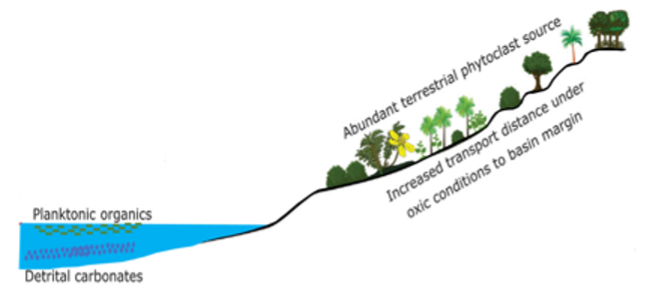

In [29]:
from IPython.display import display, Image
display(Image(filename=  "/Users/moyinolorunadegbie/Documents/SEQUEN/REGRESSED_SEA.png"))

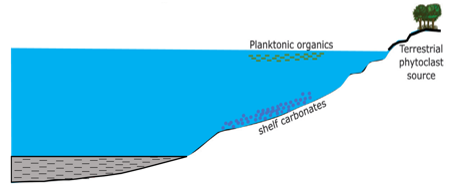

In [19]:
display(Image(filename=  "/Users/moyinolorunadegbie/Documents/SEQUEN/TRANSGRESSED_SEA.png"))

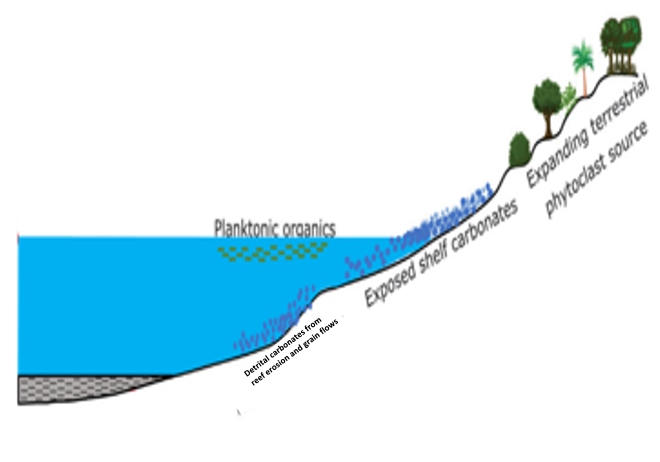

In [20]:
display(Image(filename=  "/Users/moyinolorunadegbie/Documents/SEQUEN/FALLING_SEA.png"))

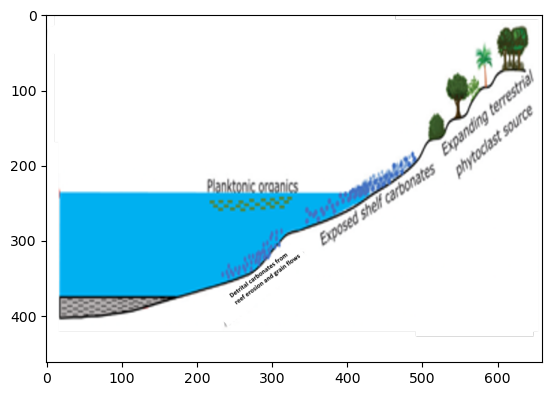

In [22]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
#plt.title("Sheep Image")
#plt.xlabel("X pixel scaling")
#plt.ylabel("Y pixels scaling")
 
image = mpimg.imread("/Users/moyinolorunadegbie/Documents/SEQUEN/FALLING_SEA.png")

plt.imshow(image)
plt.show()

In [10]:
def replace(FEE_AW_3402):
    
    FEE_AW_3402.replace( "Oil Zone" , "Oil zone" , inplace=True)
    FEE_AW_3402.replace(           "Condensate Wet Gas Zone" , "Condensate wet gas zone" , inplace=True)
    FEE_AW_3402.replace(       "Dry Gas Zone" , "Dry gas zone" , inplace=True)
    FEE_AW_3402.replace(           "Immature" , "Immature", inplace=True  )
        
    FEE_AW_3402.replace( "TYPE I KEROGEN" , "Type I Kerogen" , inplace=True)
    FEE_AW_3402.replace(          "TYPE II KEROGEN" ,  "Type II Kerogen" , inplace=True) 
    FEE_AW_3402.replace(          "TYPE II/III KEROGEN" ,  "Type II/III Kerogen" , inplace=True) ##########
    FEE_AW_3402.replace(           "TYPE III KEROGEN" ,  "Type III Kerogen" , inplace=True )   
        
       
        
        
    FEE_AW_3402.replace( "Type I: Oil Prone Usually Lacustrine"  , "Type I Kerogen oil prone usually lacustrine" , inplace=True)
    FEE_AW_3402.replace( "Type II: Oil Prone Usually Marine" , "Type II Kerogen oil prone usually marine" , inplace=True)
    FEE_AW_3402.replace( "Mixed Type II / III Oil / Gas Prone" , "Mixed Type II/III Kerogen (oil/gas prone)" , inplace=True)  
    FEE_AW_3402.replace(  "Type III: Gas Prone" , "Type III Kerogen (gas prone)" , inplace=True )
    FEE_AW_3402.replace(      "Dry Gas Prone" , "Type IV (dry gas prone)" , inplace=True  )
                
        

    FEE_AW_3402.replace(      "TYPE I KEROGEN Oil Prone" , "Type I Kerogen (highly oil prone)" , inplace=True  )
    FEE_AW_3402.replace( "TYPE II KEROGEN Oil Prone" ,  "Type II Kerogen (oil prone)"  , inplace=True )
    FEE_AW_3402.replace(       "Mixed Type II/III KEROGEN" , "Mixed Type II/III Kerogen (oil/gas prone)" , inplace=True  )
    FEE_AW_3402.replace(       "TYPE III KEROGEN Gas Prone" , "Type III Kerogen (gas prone)" , inplace=True )
            
        
    return FEE_AW_3402  
        

#FEE_AW_3402.replace(0, 5)
    
    

# ########################  NEW MAIN #############################

In [12]:
def combinations(rang):
	
	from collections import defaultdict
	
	adj = defaultdict(int)
	adj2 = defaultdict(int)
	
	lss = set()
#rangr = tuple(range(1,rang + 1))
	pool = tuple(rang)
	n = len(pool)      
	r = n 
	indices = [n]  * (n)
	cycles = [0] * (n)
	
	all_variables = [ [1,2,3,4] ,       # 4
		              [1,2,2.5,3] ,         # 4
					  [1,2,2.5,3,4] ,   # 5
					  [1,2,2.5,3] ]     # 4
	########################################################
	Kerogen_Conversion_and_Maturity  = [ "Oil zone" , "Condensate wet gas zone" , "Dry gas zone" ,  "Immature" ] # 4
	
	Kerogen_Type_and_Maturity = [ "Type I Kerogen" ,  "Type II Kerogen" , "Type II/III Kerogen",  "Type III Kerogen"  ] # 4
	
	Kerogen_Quality_Plot =  [  "Type I Kerogen oil prone usually lacustrine" , 
							"Type II Kerogen oil prone usually marine" , "Mixed Type II/III Kerogen (oil/gas prone)" ,
							"Type III Kerogen (gas prone)" , "Type IV (dry gas prone)" ]  # 5
	
	Pseudo_Van_Krevelen_Plot  = [ "Type I Kerogen (highly oil prone)"  , "Type II Kerogen (oil prone)"  ,
								"Mixed Type II/III Kerogen (oil/gas prone)" , "Type III Kerogen (gas prone)" ] # 4
	
	#variables = [Pseudo_Van_Krevelen_Plot]+[Kerogen_Quality_Plot]+[Kerogen_Type_and_Maturity]+[Kerogen_Conversion_and_Maturity]
	variables = [Kerogen_Conversion_and_Maturity]+[Kerogen_Type_and_Maturity]+[Kerogen_Quality_Plot]+[Pseudo_Van_Krevelen_Plot]
	#print(variables)
	
	##########################################
	
	lin=[len(i) for i in all_variables]
	mx = max(lin)  ## 5
	
	mat = [[0]* len(all_variables) for _ in range(mx)]
	mat2 = [[0]* len(all_variables) for _ in range(mx)]
	
	cn = 0
	for row in lin:
		
		
		for col in range(row):   # 0-4
			mat[col][cn] = 	all_variables[cn][col]				   # 0-3
			mat2[col][cn]	= 	variables[cn][col]						# 0-5
											# 0-4
			#if row < all_variables
		
		cn += 1
		"""
		[1, 1, 1,  1]
		[2, 2, 2,  2]
		[3, 3, 2.5,2.5]
		[4, 0, 3,  3]
		[0, 0, 4,  0]
		
    #    4  3  5   4
		"""
		
		##########################################
		
		#print(mat2)
	cyc = [ sum(i) for i in all_variables ] 
	
	#rang = [i+1 for i in rang ]
	while n:
		for i in reversed(range(r )):
			lss.add( tuple(cycles)  )
			temp = []
			cn=0
			q = []
			
			qw = []
	
			sm = 0
			for c in cycles:
				temp.append(  mat[c][cn] )
				
				#temp.append(  [] )
				q.append( mat2[c][cn] +" :"+str( mat[c][cn]))
				qw.append( mat2[c][cn])
	
				cn+=1
	
			#temp.append(  [ sum( temp )  ])
			sm = sum( temp ) 
	
			#print()
			cn = 0
			##print(q,temp, '       ', sm)  # <<<<<<<<<<<<<<
	
			adj[  tuple(q) ] = float(sm)
	
			adj2[  tuple(qw) ] = float(sm)
	
			cycles[i] += 1
			if cycles[i] == rang[i]:
				cycles[i] = 0
			else:
				break 
		else:
			break
	#print(adj)
	sorted_dict = dict(sorted(adj.items(), key=lambda x: x[1]))
	
	sorted_dict2 = dict(sorted(adj2.items(), key=lambda x: x[1]))
	#print(sorted_dict2)
	#print(sorted_dict)
	#return sorted( lss  ,key=sum)
	return sorted_dict,  sorted_dict2

##########################################################################################################
##########################################################################################################

def main(df):
    
    lt = [
          'Pseudo Van Krevelen Plot' ,
    'Kerogen Quality Plot'  , 
    'Kerogen Type and Maturity' ,
    'Kerogen Conversion and Maturity']    ##. ARRANGE AS NEEDED <<<<<<<<<<<<<

    ltt = lt[::-1]      #######
    
    maindf = df[ltt]
    #print(maindf)
    B = [ maindf[i].tolist() for i in list(maindf)   ]
    rez = [[B[j][i] for j in range(len(B))] for i in range(len(B[0]))] 
    
    #BB = [ maindf[i].tolist() for i in list(maindf)   ]
    #rezz = [[BB[j][i] for j in range(len(BB))] for i in range(len(BB[0]))] 
    
    #print(rez)
    rang = [ 4 , 4 , 5 , 4 ]
    
    for rezi in rez :
        rezi.append(combinations(rang)[1][  tuple(rezi)   ]    )

    
    
    rez.sort(key=lambda e: e[-1])
    
    
    #print(rez)
    
    for rezi in rez :
        rezi.pop()
        
    #print(rez)
    
    new = []
     
    for rw in range(len(rez)):
        tem = []
        for col in range(len(rez[0])):
            #tot.append(temp[rw][-1])
            #rez2[rw][col] =  ltt[col] +'   ' +str(rez2[rw][-1])+" : " +rez2[rw][col]
            tem.append(ltt[col] +" : " +rez[rw][col])
        new.append(tuple(tem))
        #rez2[rw].append(str(   sum(tot)   )    )
        
   
        
        
    
    
    #print()
    #print()
    #print()
    #print()
        
        
    #print(new)
    
    return rez, new
    



In [36]:
def main2(NEW_FEE_AL_910_KEROGEN):
    
    def best_lis( NEW_FEE_AL_910_KEROGEN)  : 
        
        
        
        #. ARRANGE / APPEND AS NEEDED ######################. <<<<<<<<<<<<<<<
        
        graph1 = {}
        graph11 = { "Oil Zone" : 1 , "Condensate Wet Gas Zone" : 2 ,
        "Dry Gas Zone" : 3 ,  "Immature" : 4  }   # priority
        
        graph11 = { "Oil zone" : 1 , "Condensate wet gas zone" : 2 ,
        "Dry gas zone" : 3 ,  "Immature" : 4  }
        
        graph111 = []
        
        def fn(KCM, graphi, graphii,graphiii):
            for j in list(KCM ):
                graphi[j] = graphii[j]
            for k, v in graphi.items():
                graphiii.append([k,v])
            graphiii.sort(key=lambda e: e[1])
            
        fn(  NEW_FEE_AL_910_KEROGEN["Kerogen Conversion and Maturity"].unique()  , graph1, graph11,graph111)

##################
        graph2 = {}
        
        graph22 = { "TYPE I KEROGEN" : 1 ,  "TYPE II KEROGEN" : 2 ,  "TYPE III KEROGEN" :  3   } #  priority
        
        graph22 = { "Type I Kerogen" : 1 ,  "Type II Kerogen" : 2 ,  "Type III Kerogen" :  3   } 
        
        graph222 = []
      
    
    
        fn(  NEW_FEE_AL_910_KEROGEN["Kerogen Type and Maturity"].unique()  , graph2, graph22,graph222)
################
        graph3 = {}

        graph33 = { "Type I: Oil Prone Usually Lacustrine"  : 1,      "Type II: Oil Prone Usually Marine" : 2 ,
            "Mixed Type II / III Oil / Gas Prone" : 3 , "Type III: Gas Prone" : 4 ,  "Dry Gas Prone" : 5  } # priority
                
        graph33 = { "Type I Kerogen oil prone usually lacustrine" : 1 ,
        "Type II Kerogen oil prone usually marine" : 2 ,
        "Mixed Type II/III Kerogen (oil/gas prone)" : 3 ,
        "Type III Kerogen (gas prone)" : 4 ,
        "Type IV (dry gas prone)" :  5 }
      
        graph333 = []
        
        fn(  NEW_FEE_AL_910_KEROGEN["Kerogen Quality Plot"].unique()  , graph3, graph33,graph333)
###############
        graph4 = {}

        graph44 = {"TYPE I KEROGEN Oil Prone" : 1 ,    "TYPE II KEROGEN Oil Prone" : 2  , 
        "Mixed Type II/III KEROGEN" : 3  , 
        "TYPE III KEROGEN Gas Prone" : 4  } # priority
            
        graph44 = { "Type I Kerogen (highly oil prone)" :  1 ,
        "Type II Kerogen (oil prone)" : 2 ,
        "Mixed Type II/III Kerogen (oil/gas prone)" : 3 ,
        "Type III Kerogen (gas prone)" : 4 }

        graph444 = []
        

        fn(  NEW_FEE_AL_910_KEROGEN["Pseudo Van Krevelen Plot"].unique()  , graph4, graph44,graph444)
        
        
    # print(graph111,'\n', graph222,'\n', graph333,'\n', graph444)  # PRIORITY
#VVVVVVVVVVVVVVVVVVVVVVVV

        

        
        def fnn(graphi, liz):
            rw = []
            for u in  graphi :      # 1ST
                rw.append(  u[0])
                break
            liz.append(rw)   
            #. ARRANGE / APPEND AS NEEDED  <<<<<<<<<<<<<<<<<<<<<<
    
        liz = []
        fnn(graph111, liz)
        fnn(graph222, liz)
        fnn(graph333, liz)
        fnn(graph444, liz)
       

    #print( liz)  #. PRIORITY !!!

        lizz = []
        for i in liz :
    #print(i)
            lizz.append(i[0])
    
#print( lizz[::-1])  #. PRIORITY

        #best_list = lizz[::-1]
        best_list = lizz    #################### <<<<<<<<<<<<<<<< REVERSE
        
        return best_list

##########################################################
    def permutations(rang):
        lss = set()
	#rangr = tuple(range(1,rang + 1))
        pool = tuple(rang)
        n = len(pool)      
        r = n 
        indices = [n]  * (n)
        cycles = [0] * (n)
	
	
        while n:
            for i in reversed(range(r )):
                lss.add( tuple(cycles)  )
                cycles[i] += 1
                if cycles[i] == rang[i]:
                    cycles[i] = 0
                else:
                    break 
            else:
                break
        return sorted( lss  )


#NEW_FEE_AL_910_KEROGEN
    lt = [
          'Pseudo Van Krevelen Plot' ,
    'Kerogen Quality Plot'  , 
    'Kerogen Type and Maturity' ,
    'Kerogen Conversion and Maturity']    ##. ARRANGE AS NEEDED <<<<<<<<<<<<<


    mat = []
    rang = []
    for i in lt[::-1]:      ##################   <<<<<<<<<<<<<<<<<<<   REVERSE
        mat.append(  list(NEW_FEE_AL_910_KEROGEN[ i ].unique()  )    )
        rang.append(   len(   list(NEW_FEE_AL_910_KEROGEN[ i ].unique()  )    )     )

 
    alll = []
    for u  in permutations(rang)   :
	#print(    k1[u],  k2[uu], k3[uuu], k4[uuuu] )
	#        0        1       2          3
        cn = 0
        temp = []
        for uv in u :
		#print(  mat[cn][uv]   ,  end=" " )
            temp.append(   mat[cn][uv]  )
            cn+=1
        alll.append(  temp )
        #print(temp,",")
    #print(alll)
    best_list = best_lis( NEW_FEE_AL_910_KEROGEN)
    
    def priority(alll, best_list) :


        for rw in alll :
    #print(rw, best_list )
    #print(  sum(x == y for x, y in zip( rw, best_list)) ) 
            num = sum(x == y for x, y in zip( rw, best_list))
            rw.append(num)

        alll.sort(key=lambda e: e[-1], reverse = True) 

        for rw in alll :
            rw.pop()


    #print(alll)
        return alll
    
    title = lt[::-1]
    
    mat2 = [[] for i in range(len(  priority(alll, best_list)  ))]

    cnn = 0
    for i in priority(alll, best_list) :
    
        cn = 0
           
        for j in i:
        
            mat2[cnn].append("        " + title[cn] + " : " + j)
            cn+=1
        mat2[cnn] = tuple( mat2[cnn]  )
            
        cnn += 1
        #lab = mat2

    #return  mat2  #priority(alll, best_list)   
    return   priority(alll, best_list)  ,  mat2

In [24]:
h = {}
h

{}

In [25]:
f=('        Kerogen Conversion and Maturity : Oil Zone', '        Kerogen Type and Maturity : TYPE II KEROGEN', '        Kerogen Quality Plot : Mixed Type II / III Oil / Gas Prone', '        Pseudo Van Krevelen Plot : Mixed Type II/III KEROGEN')
h[f] = "hoe"
h

{('        Kerogen Conversion and Maturity : Oil Zone',
  '        Kerogen Type and Maturity : TYPE II KEROGEN',
  '        Kerogen Quality Plot : Mixed Type II / III Oil / Gas Prone',
  '        Pseudo Van Krevelen Plot : Mixed Type II/III KEROGEN'): 'hoe'}

In [1136]:


SYM = pd.read_excel("/Users/moyinolorunadegbie/Documents/SYMPPPPPP.xlsx",sheet_name="Sheet2")

l = SYM['LITHOLOGY'].unique().tolist()
print( len(l) )
"""
['SAND/SHALE',       ################
 'SAND/SHALE/CONGLOMERATE',    ###################
 'SAND/MARL',   ###################
 'SAND/CONGLOMERATE/MARL',  ############
 'SHALE',   ###################
 'SANDSTONE',  #############
 'SAND/LIMESTONE',  #################
 'LIMESTONE',      ##################
 'SHALE/MARL',    ###############
 'SAND/CONGLOMERATE',  #################
 'ANHYDRITE/SALT',  #################
 'SALT',          ###############
 'ANHYDRITE',    #####################
 'ANHYDRITE/SHALE/SAND/DOLOMITE', #########
 'ANHYDRITE/SALT/DOLOMITE',    ##########
 'ANHYDRITE/SHALE',       ##########
 'ANHYDRITE/SHALE/SAND',    ##################
 'LIMESTONE/DOLOMITE',   ##################
 'SHALE/LIMESTONE',    ##############
 'DOLOMITE',    ################
 'GRANITE']    ###############
 
 """

21


"\n['SAND/SHALE',       ################\n 'SAND/SHALE/CONGLOMERATE',    ###################\n 'SAND/MARL',   ###################\n 'SAND/CONGLOMERATE/MARL',  ############\n 'SHALE',   ###################\n 'SANDSTONE',  #############\n 'SAND/LIMESTONE',  #################\n 'LIMESTONE',      ##################\n 'SHALE/MARL',    ###############\n 'SAND/CONGLOMERATE',  #################\n 'ANHYDRITE/SALT',  #################\n 'SALT',          ###############\n 'ANHYDRITE',    #####################\n 'ANHYDRITE/SHALE/SAND/DOLOMITE', #########\n 'ANHYDRITE/SALT/DOLOMITE',    ##########\n 'ANHYDRITE/SHALE',       ##########\n 'ANHYDRITE/SHALE/SAND',    ##################\n 'LIMESTONE/DOLOMITE',   ##################\n 'SHALE/LIMESTONE',    ##############\n 'DOLOMITE',    ################\n 'GRANITE']    ###############\n \n "

In [1137]:
lithology_numbers = {1: {'lith':'SAND/CONGLOMERATE', 'lith_num':1, 'hatch': 'ooo', 'color':'#ffff00'},
    
    2: {'lith':'SANDSTONE', 'lith_num':2, 'hatch': '...', 'color':'#ffff00'},
                 3: {'lith':'SAND/SHALE', 'lith_num':3, 'hatch':'--...', 'color':'#ffe119'},  #. #ffe119
                     
                     14: {'lith':'SAND/SHALE/CONGLOMERATE', 'lith_num':14, 'hatch':'---.', 'color':'#ffe119'}, 
                     15: {'lith':'SAND/CONGLOMERATE/MARL', 'lith_num':15, 'hatch': 'o./o', 'color':'#7cfc00'},
                    16: {'lith':'ANHYDRITE/SHALE/SAND/DOLOMITE', 'lith_num':16, 'hatch':'---/..', 'color':'#ff80ff'},
                     17: {'lith':'ANHYDRITE/SALT/DOLOMITE', 'lith_num':17, 'hatch':'-/x', 'color':'#ff80ff'},
                      18: {'lith':'ANHYDRITE/SHALE/SAND', 'lith_num':18, 'hatch':'---/.', 'color':'#ff80ff'},#
                      19: {'lith':'ANHYDRITE/SHALE', 'lith_num':19, 'hatch':'/---', 'color':'#ff80ff'},#
                      20: {'lith':'LIMESTONE/DOLOMITE', 'lith_num':20, 'hatch':'++-/', 'color':'#80ffff'},
                     21: {'lith':'SHALE/LIMESTONE', 'lith_num':21, 'hatch':'++--', 'color':'blue'},
                     
                     
                     
                     
                     22: {'lith':'LIMESTONE/CHERT', 'lith_num':22, 'hatch':'|-*', 'color':'dodgerblue'},
                     23: {'lith':'SHALE/LIMESTONE/CHERT', 'lith_num':23, 'hatch':'++|-', 'color':'dodgerblue'},
                     
                     
                    4: {'lith':'SAND/MARL', 'lith_num':4, 'hatch': '....', 'color':'#7cfc00'},
                 5: {'lith':'SHALE', 'lith_num':5, 'hatch':'---', 'color':'#bebebe'},
                 6: {'lith':'SHALE/MARL', 'lith_num':6, 'hatch':'---', 'color':'#7cfc00'},
                 7: {'lith':'DOLOMITE', 'lith_num':7, 'hatch':'-/-/', 'color':'#8080ff'},
                 8: {'lith':'LIMESTONE', 'lith_num':8, 'hatch':'+++', 'color':'#80ffff'},
                 9: {'lith':'SAND/LIMESTONE', 'lith_num':9, 'hatch':'....', 'color':'#80ffff'},
                 10: {'lith':'SALT', 'lith_num':10, 'hatch':'xxx', 'color':'#7ddfbe'},
                    
                 11: {'lith':'ANHYDRITE', 'lith_num':11, 'hatch':'', 'color':'#ff80ff'},    
                     
                 12: {'lith':'ANHYDRITE/SALT', 'lith_num':12, 'hatch':'xxx', 'color':'#ff80ff'},
                 #99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 #90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 13: {'lith':'GRANITE', 'lith_num':13, 'hatch':'--||', 'color':'#ef138a'}}


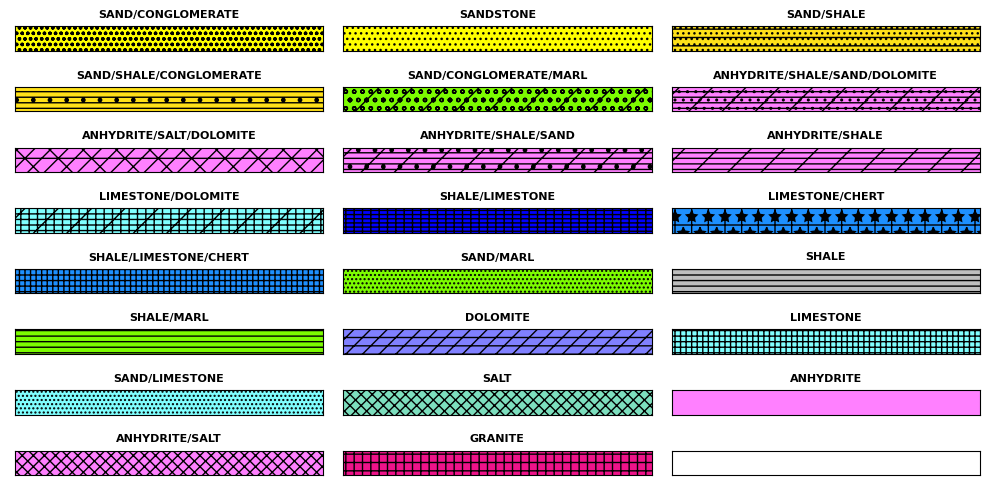

In [1138]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=3,nrows=8, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith'])  , fontsize = 8, fontweight='bold')

plt.tight_layout()

plt.show()

In [1139]:
def makeplot(f):
    
    lithology_numbers =  {1: {'lith':'SAND/CONGLOMERATE', 'lith_num':1, 'hatch': 'ooo', 'color':'#ffff00'},
    
    2: {'lith':'SANDSTONE', 'lith_num':2, 'hatch': '...', 'color':'#ffff00'},
                 3: {'lith':'SAND/SHALE', 'lith_num':3, 'hatch':'--...', 'color':'#ffe119'},  #. #ffe119
                     
                     14: {'lith':'SAND/SHALE/CONGLOMERATE', 'lith_num':14, 'hatch':'---.', 'color':'#ffe119'}, 
                     15: {'lith':'SAND/CONGLOMERATE/MARL', 'lith_num':15, 'hatch': 'o./o', 'color':'#7cfc00'},
                    16: {'lith':'ANHYDRITE/SHALE/SAND/DOLOMITE', 'lith_num':16, 'hatch':'---/..', 'color':'#ff80ff'},
                     17: {'lith':'ANHYDRITE/SALT/DOLOMITE', 'lith_num':17, 'hatch':'-/x', 'color':'#ff80ff'},
                      18: {'lith':'ANHYDRITE/SHALE/SAND', 'lith_num':18, 'hatch':'---/.', 'color':'#ff80ff'},#
                      19: {'lith':'ANHYDRITE/SHALE', 'lith_num':19, 'hatch':'/---', 'color':'#ff80ff'},#
                      20: {'lith':'LIMESTONE/DOLOMITE', 'lith_num':20, 'hatch':'++-/', 'color':'#80ffff'},
                     21: {'lith':'SHALE/LIMESTONE', 'lith_num':21, 'hatch':'++--', 'color':'blue'},
                          
                          
                     22: {'lith':'LIMESTONE/CHERT', 'lith_num':22, 'hatch':'|-*', 'color':'dodgerblue'},
                     23: {'lith':'SHALE/LIMESTONE/CHERT', 'lith_num':23, 'hatch':'++|-', 'color':'dodgerblue'},
                     
                     
                     
                    4: {'lith':'SAND/MARL', 'lith_num':4, 'hatch': '....', 'color':'#7cfc00'},
                 5: {'lith':'SHALE', 'lith_num':5, 'hatch':'---', 'color':'#bebebe'},
                 6: {'lith':'SHALE/MARL', 'lith_num':6, 'hatch':'---', 'color':'#7cfc00'},
                 7: {'lith':'DOLOMITE', 'lith_num':7, 'hatch':'-/-/', 'color':'#8080ff'},
                 8: {'lith':'LIMESTONE', 'lith_num':8, 'hatch':'+++', 'color':'#80ffff'},
                 9: {'lith':'SAND/LIMESTONE', 'lith_num':9, 'hatch':'....', 'color':'#80ffff'},
                 10: {'lith':'SALT', 'lith_num':10, 'hatch':'xxx', 'color':'#7ddfbe'},
                    
                 11: {'lith':'ANHYDRITE', 'lith_num':11, 'hatch':'', 'color':'#ff80ff'},    
                     
                 12: {'lith':'ANHYDRITE/SALT', 'lith_num':12, 'hatch':'xxx', 'color':'#ff80ff'},
                 #99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 #90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 13: {'lith':'GRANITE', 'lith_num':13, 'hatch':'--||', 'color':'#ef138a'}}




    top_depth =  min(f['DEPTH'])
    bottom_depth =    max(f['DEPTH']) 
         
    #fig, ax = plt.subplots(figsize=(2.5, 15))
    
    fig, ax = plt.subplots(figsize=(5.5, 17.9))

    ax12 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
    
    
    
# Lithology track
    ax12.plot(f["lith_num"], f['DEPTH'], color = "black", linewidth = 0.1)  # 0.5
    #ax12.set_xlabel("lith_num")
    #ax12.set_xlim(0, 1)
    #ax12.set_xlim(0, 1,2,3)       ##############. <<<<<<<<<<,
    #ax12.set_xlim(False)
    ax12.xaxis.label.set_color("black")
    ax12.tick_params(axis='x', colors="black")
    ax12.spines["top"].set_edgecolor("black")
    ax12.yaxis.set_ticks_position("left")
    ax12.yaxis.set_label_position("left")
    #ax12.set_ylim(  7500, 11000 )
    #plt.yticks(np.arange(7500, 11000, 100)) 
    
    ax12.set_ylim(  top_depth, bottom_depth )
    #plt.yticks(np.arange(5132, 11000, 150)) 
    
    for key in lithology_numbers.keys():
        color = lithology_numbers[key]['color']
        hatch = lithology_numbers[key]['hatch']
        ax12.fill_betweenx(f['DEPTH'], 0, f['lith_num'], where=(f['lith_num']==key),
                         facecolor=color, hatch=hatch)
        

    ax12.set_xticks([0, 1])

    for ax in [ax12]:
        #ax.set_ylim(8000 , 10880.0)## 8040.5, 10850.0)
        #ax.set_ylim(5132 , 11477.0)## 8040.5, 10850.0)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        #ax.spines["top"].set_position(("axes", 0.25))
        
        # @@@@@
    ax13 = plt.subplot2grid((1,10), (0,6), rowspan=1, colspan = 1, sharey = ax12)
    ax13.set_xticklabels([])
    ax13.text(0.5, 1.01, 'PERIODS', fontweight='bold',
             horizontalalignment='center', transform=ax13.transAxes)
    
    for ax in [ax12]:
        plt.setp(ax.get_yticklabels(), visible = True)
        ax.invert_yaxis()
    
        
      #
    
    
    formations_dict = {"PRECAMBRIAN":[min(f.loc[f['AGE']=="PRECAMBRIAN"].index.values), max(f.loc[f['AGE']=="PRECAMBRIAN"].index.values)]  ,
                      
     "CAMBRIAN":[min(f.loc[f['AGE']=="CAMBRIAN"].index.values), max(f.loc[f['AGE']=="CAMBRIAN"].index.values)]  ,
                       
    "ORDOVICIAN":[min(f.loc[f['AGE']=="ORDOVICIAN"].index.values), max(f.loc[f['AGE']=="ORDOVICIAN"].index.values)] ,
    "SILURIAN":[min(f.loc[f['AGE']=="SILURIAN"].index.values), max(f.loc[f['AGE']=="SILURIAN"].index.values)] ,
    "DEVONIAN":[min(f.loc[f['AGE']=="DEVONIAN"].index.values), max(f.loc[f['AGE']=="DEVONIAN"].index.values)] ,

    "MISSISSIPIAN":[min(f.loc[f['AGE']=="MISSISSIPIAN"].index.values), max(f.loc[f['AGE']=="MISSISSIPIAN"].index.values)] ,

    "PENNSYLVANIAN":[min(f.loc[f['AGE']=="PENNSYLVANIAN"].index.values), max(f.loc[f['AGE']=="PENNSYLVANIAN"].index.values)] ,

    "PERMIAN":[min(f.loc[f['AGE']=="PERMIAN"].index.values), max(f.loc[f['AGE']=="PERMIAN"].index.values)] ,

    "TRIASSIC":[min(f.loc[f['AGE']=="TRIASSIC"].index.values), max(f.loc[f['AGE']=="TRIASSIC"].index.values)] ,

    "JURASSIC":[min(f.loc[f['AGE']=="JURASSIC"].index.values), max(f.loc[f['AGE']=="JURASSIC"].index.values)] ,

    "CRETACEOUS":[min(f.loc[f['AGE']=="CRETACEOUS"].index.values), max(f.loc[f['AGE']=="CRETACEOUS"].index.values)] ,

    "PALEOGENE":[min(f.loc[f['AGE']=="PALEOGENE"].index.values), max(f.loc[f['AGE']=="PALEOGENE"].index.values)] ,

 "NEOGENE":[min(f.loc[f['AGE']=="NEOGENE"].index.values), max(f.loc[f['AGE']=="NEOGENE"].index.values)] ,
                                 
                  
                      
                      
                      
                      
                      }   #  12 COLORS
    formation_midpoints = []
    for key, value in formations_dict.items():
        formation_midpoints.append(value[0] + (value[1]-value[0])/2)
    
    #formation_midpoints
    zone_colors = ["red","firebrick","purple","sandybrown", "darkgrey","navy","cyan","yellow","seagreen","aquamarine","lime","orange","violet"] #,
    formations =  formations_dict
    colors = zone_colors
                   #
    
    for ax in [ax12,ax13]:
        # loop through the formations dictionary and zone colors
        for depth, color in zip(formations.values(), colors):
            # use the depths and colors to shade across the subplots
            ax.axhspan(depth[0], depth[1], color=color, alpha=0.08) # 0.1   0


    for ax in [ax12,ax13]:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax12.get_xticklabels(), visible = False)
    
    for label, formation_mid in zip(formations_dict.keys(), 
                                    formation_midpoints):
        ax13.text(-10, formation_mid, label, rotation=0,
                verticalalignment='center', fontweight='bold',
                fontsize='large')  
    
    #
    
    #plt.tight_layout()
    
    #fig.subplots_adjust(wspace = 0.15)  # 0.15
    plt.title("PERMIAN HIGHSCHOOL, STEM ACADEMY & ODESSA HIGHSCHOOL SYMPOSIUM STRATIGRAPHIC COLUMN",x=0, y=1.1)
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0)
    

In [1140]:

g= [2,2,2, 2]   # REPEATED NO. OF TIMES
y= [99,10,42, 88]
i=-1

q = []
while i<=len(g)-2: #1
    i+=1
    #print(y[i])
    for x in range(g[i]):
        #print(y[i])
        q.append(y[i])
#print(q)

In [1141]:
def lith(SYM, four):

    ans = []
    #print(len(SYM['LITHOLOGY'] ))

    g = [four] * len(SYM['LITHOLOGY'] )
    #print(g)
    y =   list( SYM['LITHOLOGY']  )
    #print(y)
    i=-1

    while i<=len(g)-2: #1
        i+=1
    #print(y[i])
        for x in range(g[i]):
            ans.append(  y[i]  )
    return ans


def lithn(SYM, four):

    ans = []

    g = [four] * len(SYM['LITHOLOGY'])

    y =   list( SYM['lith_num']  )

    i=-1

    while i<=len(g)-2: #1
        i+=1
    #print(y[i])
        for x in range(g[i]):
            ans.append(  y[i]  )
    return ans

def lithnn(SYM, four):

    ans = []

    g = [four] * len(SYM['LITHOLOGY'])

    y =   list( SYM['AGE']  )

    i=-1

    while i<=len(g)-2: #1
        i+=1
    #print(y[i])
        for x in range(g[i]):
            ans.append(  y[i]  )
    return ans

def lithnnn(SYM, four):

    ans = []

    g = [four] * len(SYM['LITHOLOGY'])

    y =   list( SYM['DEPTH']  )

    i=-1

    while i<=len(g)-2: #1
        i+=1
    #print(y[i])
        cn = 0
        for x in range(g[i]):
            if y[i] not in ans:
                ans.append(  y[i]  )
            if y[i]  in ans and cn > 0:
                ans.append( " " )
            cn+=1
            
    return ans

In [1142]:
def main2(SYM, four):
    
    
    dict={



    'SAND/CONGLOMERATE' : 1  ,
    
    'SANDSTONE' : 2 ,

    'SAND/SHALE' : 3  ,
                                   
                     
    'SAND/MARL' : 4  ,


    'SHALE' : 5  ,

    'SHALE/MARL' : 6  ,

    'DOLOMITE'  :  7  ,
 
    'LIMESTONE' : 8   ,
               
    'SAND/LIMESTONE' : 9  ,
         
    'SALT' : 10   ,
                    
    'ANHYDRITE' : 11   ,
                     
    'ANHYDRITE/SALT' : 12  ,
            
    'GRANITE' : 13   ,

    'SAND/SHALE/CONGLOMERATE' : 14   ,
          
    'SAND/CONGLOMERATE/MARL' : 15   ,
                   
    'ANHYDRITE/SHALE/SAND/DOLOMITE' : 16  ,
                 
    'ANHYDRITE/SALT/DOLOMITE' : 17   ,
                     
    'ANHYDRITE/SHALE/SAND' : 18  ,
                     
    'ANHYDRITE/SHALE' :  19   ,
                   
    'LIMESTONE/DOLOMITE' : 20   ,

                     
    'SHALE/LIMESTONE' : 21 ,
#########

    'SHALE/LIMESTONE/CHERT': 22,

    'LIMESTONE/CHERT' : 23}  
    
    
    SYM['lith_num']=SYM['LITHOLOGY'].map(dict)
#SYM
    
    
    r = pd.DataFrame(  lith(SYM, four)  )
    r.set_axis(['LITHOLOGY'], axis='columns', inplace=True) 
#r
    rr = pd.DataFrame(  lithn(SYM, four)  )
    rr.set_axis(['lith_num'], axis='columns', inplace=True) 
#rr
    rrr = pd.DataFrame(  lithnn(SYM, four)  )
    rrr.set_axis(['AGE'], axis='columns', inplace=True) 
#rr
    
    #rrr = r['LITHOLOGY']  + rr['lith_num']
    rrrr = pd.DataFrame(   )
    rrrr['LITHOLOGY']  = r
    rrrr['lith_num']   = rr
    rrrr['AGE']   = rrr

    lst = list( range(len(rrrr['LITHOLOGY']))  )
    rrrr['DEPTH'] =  pd.DataFrame(lst)
    
    
    if 'DEPTH' in SYM:
        rrrr['DEPTH_'] = SYM['DEPTH']
        
    if 'DESCRIPTION' in SYM:
        rb = pd.DataFrame(  lithnnn(SYM, four)  )
        rb.set_axis(['DEPTH'], axis='columns', inplace=True) 
#rr
        rrrr['DEPTH__'] = rb

    #makeplot( rrrr )
#rrr
    return rrrr




/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:64: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  r.set_axis(['LITHOLOGY'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:67: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  rr.set_axis(['lith_num'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  rrr.set_axis(['AGE'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/3136084709.py:164: UserWarning: Tight layout not app

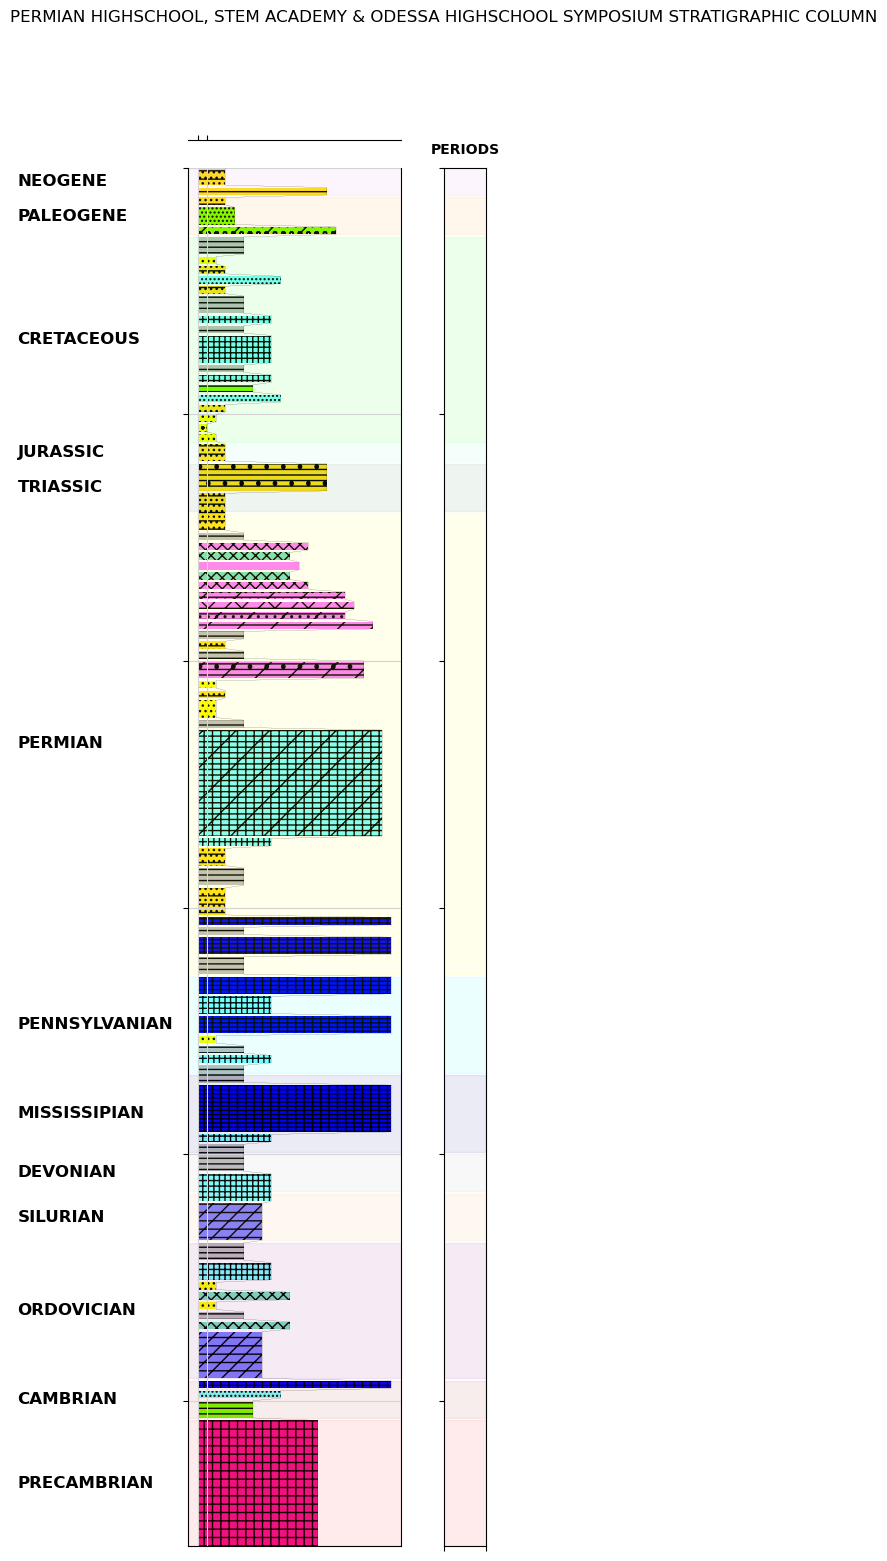

In [1143]:
#makeplot( rrrr )
makeplot(  main2(SYM, 4 )   )

# #################################################################

# FEE AL 910

In [1405]:
def makeplot2(f):
    
    lithology_numbers =  {1: {'lith':'SAND/CONGLOMERATE', 'lith_num':1, 'hatch': 'ooo', 'color':'#ffff00'},
    
    2: {'lith':'SANDSTONE', 'lith_num':2, 'hatch': '...', 'color':'#ffff00'},
                 3: {'lith':'SAND/SHALE', 'lith_num':3, 'hatch':'--...', 'color':'#ffe119'},  #. #ffe119
                     
                     14: {'lith':'SAND/SHALE/CONGLOMERATE', 'lith_num':14, 'hatch':'---.', 'color':'#ffe119'}, 
                     15: {'lith':'SAND/CONGLOMERATE/MARL', 'lith_num':15, 'hatch': 'o./o', 'color':'#7cfc00'},
                    16: {'lith':'ANHYDRITE/SHALE/SAND/DOLOMITE', 'lith_num':16, 'hatch':'---/..', 'color':'#ff80ff'},
                     17: {'lith':'ANHYDRITE/SALT/DOLOMITE', 'lith_num':17, 'hatch':'-/x', 'color':'#ff80ff'},
                      18: {'lith':'ANHYDRITE/SHALE/SAND', 'lith_num':18, 'hatch':'---/.', 'color':'#ff80ff'},#
                      19: {'lith':'ANHYDRITE/SHALE', 'lith_num':19, 'hatch':'/---', 'color':'#ff80ff'},#
                      20: {'lith':'LIMESTONE/DOLOMITE', 'lith_num':20, 'hatch':'++-/', 'color':'#80ffff'},
                     21: {'lith':'SHALE/LIMESTONE', 'lith_num':21, 'hatch':'++--', 'color':'blue'},
                          
                          
                     22: {'lith':'LIMESTONE/CHERT', 'lith_num':22, 'hatch':'|-*', 'color':'dodgerblue'},
                     23: {'lith':'SHALE/LIMESTONE/CHERT', 'lith_num':23, 'hatch':'++|-', 'color':'dodgerblue'},
                     
                     
                     
                    4: {'lith':'SAND/MARL', 'lith_num':4, 'hatch': '....', 'color':'#7cfc00'},
                 5: {'lith':'SHALE', 'lith_num':5, 'hatch':'---', 'color':'#bebebe'},
                 6: {'lith':'SHALE/MARL', 'lith_num':6, 'hatch':'---', 'color':'#7cfc00'},
                 7: {'lith':'DOLOMITE', 'lith_num':7, 'hatch':'-/-/', 'color':'#8080ff'},
                 8: {'lith':'LIMESTONE', 'lith_num':8, 'hatch':'+++', 'color':'#80ffff'},
                 9: {'lith':'SAND/LIMESTONE', 'lith_num':9, 'hatch':'....', 'color':'#80ffff'},
                 10: {'lith':'SALT', 'lith_num':10, 'hatch':'xxx', 'color':'#7ddfbe'},
                    
                 11: {'lith':'ANHYDRITE', 'lith_num':11, 'hatch':'', 'color':'#ff80ff'},    
                     
                 12: {'lith':'ANHYDRITE/SALT', 'lith_num':12, 'hatch':'xxx', 'color':'#ff80ff'},
                 #99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 #90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 13: {'lith':'GRANITE', 'lith_num':13, 'hatch':'--||', 'color':'#ef138a'}}




    top_depth =  min(f['DEPTH'])
    bottom_depth =    max(f['DEPTH']) 
         
    #fig, ax = plt.subplots(figsize=(2.5, 15))
    
    fig, ax = plt.subplots(figsize=(4, 15))

    ax12 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
    
    
    
# Lithology track
    ax12.plot(f["lith_num"], f['DEPTH'], color = "black", linewidth = 0.1)  # 0.5
    #ax12.set_xlabel("lith_num")
    #ax12.set_xlim(0, 1)
    #ax12.set_xlim(0, 1,2,3)       ##############. <<<<<<<<<<,
    #ax12.set_xlim(False)
    ax12.xaxis.label.set_color("black")
    ax12.tick_params(axis='x', colors="black")
    ax12.spines["top"].set_edgecolor("black")
    ax12.yaxis.set_ticks_position("left")
    ax12.yaxis.set_label_position("left")
    #ax12.set_ylim(  7500, 11000 )
    #plt.yticks(np.arange(7500, 11000, 100)) 
    
    ax12.set_ylim(  top_depth, bottom_depth )
    #plt.yticks(np.arange(5132, 11000, 150)) 
    
    for key in lithology_numbers.keys():
        color = lithology_numbers[key]['color']
        hatch = lithology_numbers[key]['hatch']
        ax12.fill_betweenx(f['DEPTH'], 0, f['lith_num'], where=(f['lith_num']==key),
                         facecolor=color, hatch=hatch)
        

    ax12.set_xticks([0, 1])

    for ax in [ax12]:
        #ax.set_ylim(8000 , 10880.0)## 8040.5, 10850.0)
        #ax.set_ylim(5132 , 11477.0)## 8040.5, 10850.0)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        #ax.spines["top"].set_position(("axes", 0.25))
        
        
    ax.set_yticks(f['DEPTH'])  ## <<<<<<<<<<<<<<<<<<<<<<

    #ax12.set_yticks(np.arange(min(f['DEPTH_']),max(f['DEPTH_']),500))
    
    #ax12.set_yticklabels(f['DEPTH_'])
    ax.set_yticklabels(f['DEPTH_'])
    ax.set_yticks(np.arange(min(f['DEPTH']),max(f['DEPTH']),100)) # <<<<<<
        
        
        # @@@@@
    #ax13 = plt.subplot2grid((1,10), (0,7), rowspan=1, colspan = 1, sharey = ax12)
    #ax13.set_xticklabels([])
    #ax13.text(0.5, 1.01, 'PERIODS', fontweight='bold',
           #  horizontalalignment='center', transform=ax13.transAxes)
    
    #for ax in [ax12]:
        #plt.setp(ax.get_yticklabels(), visible = True)
        #ax.invert_yaxis()
    ## @@@@@@@@@@@@
        
      #
    
    
    formations_dict = {"BASAL LOWER SPRABERRY":[min(f.loc[f['AGE']=="BASAL LOWER SPRABERRY"].index.values), max(f.loc[f['AGE']=="BASAL LOWER SPRABERRY"].index.values)]  ,
                      
      "DEAN LIMESTONE":[min(f.loc[f['AGE']=="DEAN LIMESTONE"].index.values), max(f.loc[f['AGE']=="DEAN LIMESTONE"].index.values)] ,
                       
    "UPPER WOLFCAMP CARBONATE MEMBER":[min(f.loc[f['AGE']=="UPPER WOLFCAMP CARBONATE MEMBER"].index.values), max(f.loc[f['AGE']=="UPPER WOLFCAMP CARBONATE MEMBER"].index.values)]  ,
                       
   
    "LOWER WOLFCAMP SHALE MEMBER":[min(f.loc[f['AGE']=="LOWER WOLFCAMP SHALE MEMBER"].index.values), max(f.loc[f['AGE']=="LOWER WOLFCAMP SHALE MEMBER"].index.values)]  ,
                       
    "WOLFCAMP":[min(f.loc[f['AGE']=="WOLFCAMP"].index.values), max(f.loc[f['AGE']=="WOLFCAMP"].index.values)] ,

    "BASAL WOLFCAMP":[min(f.loc[f['AGE']=="BASAL WOLFCAMP"].index.values), max(f.loc[f['AGE']=="BASAL WOLFCAMP"].index.values)] ,
                       
                       
    "CLINE":[min(f.loc[f['AGE']=="CLINE"].index.values), max(f.loc[f['AGE']=="CLINE"].index.values)] ,
                       
    "LOWER CLINE":[min(f.loc[f['AGE']=="LOWER CLINE"].index.values), max(f.loc[f['AGE']=="LOWER CLINE"].index.values)] ,
                       
                         
    "STRAWN":[min(f.loc[f['AGE']=="STRAWN"].index.values), max(f.loc[f['AGE']=="STRAWN"].index.values)]                 
                    
                      
                      
                      }   #  9  COLORS
    formation_midpoints = []
    for key, value in formations_dict.items():
        formation_midpoints.append(value[0] + (value[1]-value[0])/2)
    
    #formation_midpoints
    zone_colors = ["lime","blue","darkkhaki", "olive","yellow","gold","darkblue","cornflowerblue","aqua"] #,
    formations =  formations_dict
    colors = zone_colors
                   #
    
    for ax in [ax12]:#,ax13]:
        # loop through the formations dictionary and zone colors
        for depth, color in zip(formations.values(), colors):
            # use the depths and colors to shade across the subplots
            ax.axhspan(depth[0], depth[1], color=color, alpha=0.05) # 0.1   0


    for ax in [ax12]:#,ax13]:
        plt.setp(ax.get_yticklabels(), visible = True)
    
    plt.setp(ax12.get_xticklabels(), visible = False)
    
    for label, formation_mid in zip(formations_dict.keys(), 
                                    formation_midpoints):
        ax.text(-12, formation_mid, label, rotation=90,
                verticalalignment='center', fontweight='bold',
                fontsize=4.8)  
    
    #
    
    #plt.tight_layout()
    ax12.invert_yaxis() #####<<<<<<<<
    #fig.subplots_adjust(wspace = 0.15)  # 0.15
    plt.title("FEE AL 910",x=0, y=1.1)
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0)
    

In [1406]:


AL910 = pd.read_excel("/Users/moyinolorunadegbie/Documents/SYMPPPPPP.xlsx",sheet_name="FEE_AL")



/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:64: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  r.set_axis(['LITHOLOGY'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:67: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  rr.set_axis(['lith_num'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  rrr.set_axis(['AGE'], axis='columns', inplace=True)


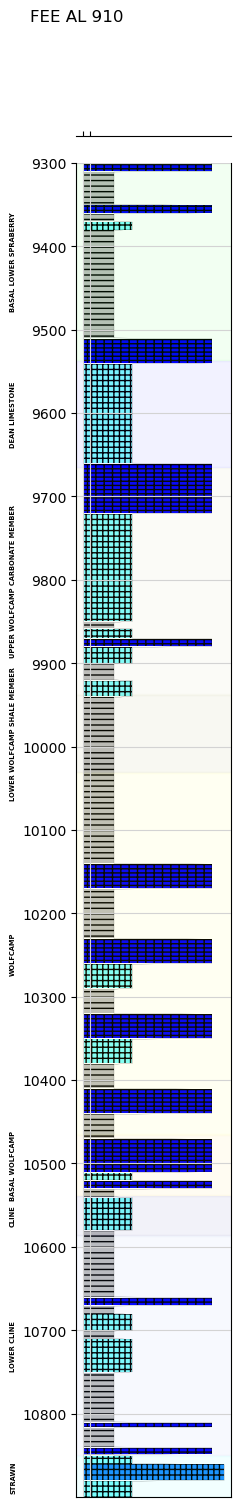

In [1407]:

makeplot2(  main2(AL910, 1 )   )

# #################################################################

# FEE BI 307

In [1147]:
def makeplot3(f):
    
    lithology_numbers =  {1: {'lith':'SAND/CONGLOMERATE', 'lith_num':1, 'hatch': 'ooo', 'color':'#ffff00'},
    
    2: {'lith':'SANDSTONE', 'lith_num':2, 'hatch': '...', 'color':'#ffff00'},
                 3: {'lith':'SAND/SHALE', 'lith_num':3, 'hatch':'--...', 'color':'#ffe119'},  #. #ffe119
                     
                     14: {'lith':'SAND/SHALE/CONGLOMERATE', 'lith_num':14, 'hatch':'---.', 'color':'#ffe119'}, 
                     15: {'lith':'SAND/CONGLOMERATE/MARL', 'lith_num':15, 'hatch': 'o./o', 'color':'#7cfc00'},
                    16: {'lith':'ANHYDRITE/SHALE/SAND/DOLOMITE', 'lith_num':16, 'hatch':'---/..', 'color':'#ff80ff'},
                     17: {'lith':'ANHYDRITE/SALT/DOLOMITE', 'lith_num':17, 'hatch':'-/x', 'color':'#ff80ff'},
                      18: {'lith':'ANHYDRITE/SHALE/SAND', 'lith_num':18, 'hatch':'---/.', 'color':'#ff80ff'},#
                      19: {'lith':'ANHYDRITE/SHALE', 'lith_num':19, 'hatch':'/---', 'color':'#ff80ff'},#
                      20: {'lith':'LIMESTONE/DOLOMITE', 'lith_num':20, 'hatch':'++-/', 'color':'#80ffff'},
                     21: {'lith':'SHALE/LIMESTONE', 'lith_num':21, 'hatch':'++--', 'color':'blue'},
                          
                          
                     22: {'lith':'LIMESTONE/CHERT', 'lith_num':22, 'hatch':'|-*', 'color':'dodgerblue'},
                     23: {'lith':'SHALE/LIMESTONE/CHERT', 'lith_num':23, 'hatch':'++|-', 'color':'dodgerblue'},
                     
                     
                     
                    4: {'lith':'SAND/MARL', 'lith_num':4, 'hatch': '....', 'color':'#7cfc00'},
                 5: {'lith':'SHALE', 'lith_num':5, 'hatch':'---', 'color':'#bebebe'},
                 6: {'lith':'SHALE/MARL', 'lith_num':6, 'hatch':'---', 'color':'#7cfc00'},
                 7: {'lith':'DOLOMITE', 'lith_num':7, 'hatch':'-/-/', 'color':'#8080ff'},
                 8: {'lith':'LIMESTONE', 'lith_num':8, 'hatch':'+++', 'color':'#80ffff'},
                 9: {'lith':'SAND/LIMESTONE', 'lith_num':9, 'hatch':'....', 'color':'#80ffff'},
                 10: {'lith':'SALT', 'lith_num':10, 'hatch':'xxx', 'color':'#7ddfbe'},
                    
                 11: {'lith':'ANHYDRITE', 'lith_num':11, 'hatch':'', 'color':'#ff80ff'},    
                     
                 12: {'lith':'ANHYDRITE/SALT', 'lith_num':12, 'hatch':'xxx', 'color':'#ff80ff'},
                 #99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 #90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 13: {'lith':'GRANITE', 'lith_num':13, 'hatch':'--||', 'color':'#ef138a'}}




    top_depth =  min(f['DEPTH'])
    bottom_depth =    max(f['DEPTH']) 
         
    #fig, ax = plt.subplots(figsize=(2.5, 15))
    
    fig, ax = plt.subplots(figsize=(4, 15))

    ax12 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
    
    
    
# Lithology track
    ax12.plot(f["lith_num"], f['DEPTH'], color = "black", linewidth = 0.1)  # 0.5
    #ax12.set_xlabel("lith_num")
    #ax12.set_xlim(0, 1)
    #ax12.set_xlim(0, 1,2,3)       ##############. <<<<<<<<<<,
    #ax12.set_xlim(False)
    ax12.xaxis.label.set_color("black")
    ax12.tick_params(axis='x', colors="black")
    ax12.spines["top"].set_edgecolor("black")
    ax12.yaxis.set_ticks_position("left")
    ax12.yaxis.set_label_position("left")
    #ax12.set_ylim(  7500, 11000 )
    #plt.yticks(np.arange(min(f['DEPTH']), max(f['DEPTH']), 50)) 
    
    #ax12.set_yticks(f['DEPTH'])
    ax12.set_yticks(f['DEPTH'])

    #ax12.set_yticks(np.arange(min(f['DEPTH_']),max(f['DEPTH_']),500))
    
    #ax12.set_yticklabels(f['DEPTH_'])
    ax12.set_yticklabels(f['DEPTH_'])
    ax12.set_yticks(np.arange(min(f['DEPTH']),max(f['DEPTH']),50))

    
    #ax12.set_ylim(  top_depth, bottom_depth )
    #plt.yticks(np.arange(5132, 11000, 150)) 
    
    for key in lithology_numbers.keys():
        color = lithology_numbers[key]['color']
        hatch = lithology_numbers[key]['hatch']
        ax12.fill_betweenx(f['DEPTH'], 0, f['lith_num'], where=(f['lith_num']==key),
                         facecolor=color, hatch=hatch)
        

    ax12.set_xticks([0, 1])

    for ax in [ax12]:
        #ax.set_ylim(8000 , 10880.0)## 8040.5, 10850.0)
        #ax.set_ylim(5132 , 11477.0)## 8040.5, 10850.0)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        #ax.spines["top"].set_position(("axes", 0.25))
        
        # @@@@@    VVVVVVVVV
    #ax13 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1, sharey = ax12)   
    #ax13.set_xticklabels([])
    #ax13.text(0.5, 1.01, 'PERIODS', fontweight='bold',
             #horizontalalignment='center', transform=ax13.transAxes)
    
    #for ax in [ax12]:
        #plt.setp(ax.get_yticklabels(), visible = True)
        #ax.invert_yaxis()
    
        
      #   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    
    
    formations_dict = {"LOWER SPRABERRY":[min(f.loc[f['AGE']=="LOWER SPRABERRY"].index.values), max(f.loc[f['AGE']=="LOWER SPRABERRY"].index.values)]  ,
                      
      "DEAN LIMESTONE":[min(f.loc[f['AGE']=="DEAN LIMESTONE"].index.values), max(f.loc[f['AGE']=="DEAN LIMESTONE"].index.values)] ,
                       
   
    "WOLFCAMP":[min(f.loc[f['AGE']=="WOLFCAMP"].index.values), max(f.loc[f['AGE']=="WOLFCAMP"].index.values)] ,

   
                       
    "CLINE":[min(f.loc[f['AGE']=="CLINE"].index.values), max(f.loc[f['AGE']=="CLINE"].index.values)] ,
                       
  
    "STRAWN":[min(f.loc[f['AGE']=="STRAWN"].index.values), max(f.loc[f['AGE']=="STRAWN"].index.values)]                 
                    
                      
                      
                      }   #  9  COLORS
    formation_midpoints = []
    for key, value in formations_dict.items():
        formation_midpoints.append(value[0] + (value[1]-value[0])/2)
    
    #formation_midpoints
    zone_colors = ["lime","blue","yellow","darkblue","aqua"] #,
    formations =  formations_dict
    colors = zone_colors
                   #
    
    for ax in [ax12]:
        # loop through the formations dictionary and zone colors
        for depth, color in zip(formations.values(), colors):
            # use the depths and colors to shade across the subplots
            ax.axhspan(depth[0], depth[1], color=color, alpha=0.05) # 0.1   0


    for ax in [ax12]:
        plt.setp(ax.get_yticklabels(), visible = True)
        
    
    plt.setp(ax.get_xticklabels(), visible = False)
    
    for label, formation_mid in zip(   formations_dict.keys(), 
                                    formation_midpoints):
        ax12.text(-12, formation_mid, label, rotation=90,      ###. <<<<<<<<<<<<<<<
                verticalalignment='center', fontweight='bold',
                fontsize=10)  
    
    #
    
    #plt.tight_layout()
    
    
    #ax.set_yticks(np.arange(min(f['DEPTH_']),max(f['DEPTH_']),100))
    #ax12.set_yticklabels(   np.arange(min(f['DEPTH_']),max(f['DEPTH_']))   )
    
    ax12.invert_yaxis()
    
    #fig.subplots_adjust(wspace = 0.15)  # 0.15
    plt.title("FEE BI 307",x=0, y=1.1)
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0)
    

In [1274]:
BI307 = pd.read_excel("/Users/moyinolorunadegbie/Documents/SYMPPPPPP.xlsx",sheet_name="FEE_BI")

/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:64: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  r.set_axis(['LITHOLOGY'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:67: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  rr.set_axis(['lith_num'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  rrr.set_axis(['AGE'], axis='columns', inplace=True)


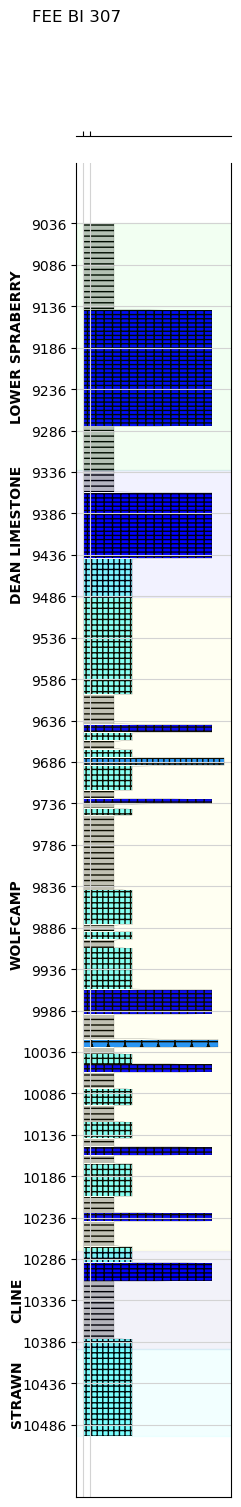

In [1275]:
makeplot3(  main2(BI307, 1 )   )

# #################################################################

# FEE AW 3402

In [1150]:
def makeplot4(f):
    
    lithology_numbers =  {1: {'lith':'SAND/CONGLOMERATE', 'lith_num':1, 'hatch': 'ooo', 'color':'#ffff00'},
    
    2: {'lith':'SANDSTONE', 'lith_num':2, 'hatch': '...', 'color':'#ffff00'},
                 3: {'lith':'SAND/SHALE', 'lith_num':3, 'hatch':'--...', 'color':'#ffe119'},  #. #ffe119
                     
                     14: {'lith':'SAND/SHALE/CONGLOMERATE', 'lith_num':14, 'hatch':'---.', 'color':'#ffe119'}, 
                     15: {'lith':'SAND/CONGLOMERATE/MARL', 'lith_num':15, 'hatch': 'o./o', 'color':'#7cfc00'},
                    16: {'lith':'ANHYDRITE/SHALE/SAND/DOLOMITE', 'lith_num':16, 'hatch':'---/..', 'color':'#ff80ff'},
                     17: {'lith':'ANHYDRITE/SALT/DOLOMITE', 'lith_num':17, 'hatch':'-/x', 'color':'#ff80ff'},
                      18: {'lith':'ANHYDRITE/SHALE/SAND', 'lith_num':18, 'hatch':'---/.', 'color':'#ff80ff'},#
                      19: {'lith':'ANHYDRITE/SHALE', 'lith_num':19, 'hatch':'/---', 'color':'#ff80ff'},#
                      20: {'lith':'LIMESTONE/DOLOMITE', 'lith_num':20, 'hatch':'++-/', 'color':'#80ffff'},
                     21: {'lith':'SHALE/LIMESTONE', 'lith_num':21, 'hatch':'++--', 'color':'blue'},
                          
                          
                     22: {'lith':'LIMESTONE/CHERT', 'lith_num':22, 'hatch':'|-*', 'color':'dodgerblue'},
                     23: {'lith':'SHALE/LIMESTONE/CHERT', 'lith_num':23, 'hatch':'++|-', 'color':'dodgerblue'},
                     
                     
                     
                    4: {'lith':'SAND/MARL', 'lith_num':4, 'hatch': '....', 'color':'#7cfc00'},
                 5: {'lith':'SHALE', 'lith_num':5, 'hatch':'---', 'color':'#bebebe'},
                 6: {'lith':'SHALE/MARL', 'lith_num':6, 'hatch':'---', 'color':'#7cfc00'},
                 7: {'lith':'DOLOMITE', 'lith_num':7, 'hatch':'-/-/', 'color':'#8080ff'},
                 8: {'lith':'LIMESTONE', 'lith_num':8, 'hatch':'+++', 'color':'#80ffff'},
                 9: {'lith':'SAND/LIMESTONE', 'lith_num':9, 'hatch':'....', 'color':'#80ffff'},
                 10: {'lith':'SALT', 'lith_num':10, 'hatch':'xxx', 'color':'#7ddfbe'},
                    
                 11: {'lith':'ANHYDRITE', 'lith_num':11, 'hatch':'', 'color':'#ff80ff'},    
                     
                 12: {'lith':'ANHYDRITE/SALT', 'lith_num':12, 'hatch':'xxx', 'color':'#ff80ff'},
                 #99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 #90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 13: {'lith':'GRANITE', 'lith_num':13, 'hatch':'--||', 'color':'#ef138a'}}




    top_depth =  min(f['DEPTH']) 
    bottom_depth =    max(f['DEPTH'])  
         
    #fig, ax = plt.subplots(figsize=(2.5, 15))
    
    fig, ax = plt.subplots(figsize=(4, 14))

    ax12 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
    
    
    
# Lithology track
    ax12.plot(f["lith_num"], f['DEPTH'], color = "black", linewidth = 0.1)  # 0.5
    #ax12.set_xlabel("lith_num")
    #ax12.set_xlim(0, 1)
    #ax12.set_xlim(0, 1,2,3)       ##############. <<<<<<<<<<,
    #ax12.set_xlim(False)
    ax12.xaxis.label.set_color("black")
    ax12.tick_params(axis='x', colors="black")
    ax12.spines["top"].set_edgecolor("black")
    ax12.yaxis.set_ticks_position("left")
    ax12.yaxis.set_label_position("left")
    #ax12.set_ylim(  7500, 11000 )
    #plt.yticks(np.arange(min(f['DEPTH']), max(f['DEPTH']), 50)) 
    
    #ax12.set_yticks(f['DEPTH'])
    ax12.set_yticks(f['DEPTH'])

    #ax12.set_yticks(np.arange(min(f['DEPTH']),max(f['DEPTH']),50))
    
    #ax12.set_yticklabels(f['DEPTH_'])
    ax12.set_yticklabels(f['DEPTH__'] )
    #ax12.set_yticks(np.arange(min(    int(f['DEPTH__'])   ),max(   int(f['DEPTH__'])   ),50))

    
    #ax12.set_ylim(  top_depth, bottom_depth )
    #plt.yticks(np.arange(5132, 11000, 150)) 
    
    for key in lithology_numbers.keys():
        color = lithology_numbers[key]['color']
        hatch = lithology_numbers[key]['hatch']
        ax12.fill_betweenx(f['DEPTH'], 0, f['lith_num'], where=(f['lith_num']==key),
                         facecolor=color, hatch=hatch)
        

    ax12.set_xticks([0, 1])

    for ax in [ax12]:
        #ax.set_ylim(8000 , 10880.0)## 8040.5, 10850.0)
        #ax.set_ylim(5132 , 11477.0)## 8040.5, 10850.0)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        #ax.spines["top"].set_position(("axes", 0.25))
        
        # @@@@@    VVVVVVVVV
    #ax13 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1, sharey = ax12)   
    #ax13.set_xticklabels([])
    #ax13.text(0.5, 1.01, 'PERIODS', fontweight='bold',
             #horizontalalignment='center', transform=ax13.transAxes)
    
    #for ax in [ax12]:
        #plt.setp(ax.get_yticklabels(), visible = True)
        #ax.invert_yaxis()
    
        
      #   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    
    
    formations_dict = {"LOWER SPRABERRY":[min(f.loc[f['AGE']=="LOWER SPRABERRY"].index.values), max(f.loc[f['AGE']=="LOWER SPRABERRY"].index.values)]  ,
                      
      "DEAN LIMESTONE":[min(f.loc[f['AGE']=="DEAN LIMESTONE"].index.values), max(f.loc[f['AGE']=="DEAN LIMESTONE"].index.values)] ,
                       
   
    "WOLFCAMP":[min(f.loc[f['AGE']=="WOLFCAMP"].index.values), max(f.loc[f['AGE']=="WOLFCAMP"].index.values)] ,

   
                       
    "CLINE":[min(f.loc[f['AGE']=="CLINE"].index.values), max(f.loc[f['AGE']=="CLINE"].index.values)]            
                    
                      
                      
                      }   #  9  COLORS
    formation_midpoints = []
    for key, value in formations_dict.items():
        formation_midpoints.append(value[0] + (value[1]-value[0])/2)
    
    #formation_midpoints
    zone_colors = ["lime","blue","yellow","darkblue","aqua"] #,
    formations =  formations_dict
    colors = zone_colors
                   #
    
    for ax in [ax12]:
        # loop through the formations dictionary and zone colors
        for depth, color in zip(formations.values(), colors):
            # use the depths and colors to shade across the subplots
            ax.axhspan(depth[0], depth[1], color=color, alpha=0.05) # 0.1   0


    for ax in [ax12]:
        plt.setp(ax.get_yticklabels(), visible = True)
        
    
    plt.setp(ax.get_xticklabels(), visible = False)
    
    for label, formation_mid in zip(   formations_dict.keys(), 
                                    formation_midpoints):
        ax12.text(-12, formation_mid, label, rotation=90,      ###. <<<<<<<<<<<<<<<
                verticalalignment='center', fontweight='bold',
                fontsize=10)  
    
    #
    
    #plt.tight_layout()
    
    
    #ax.set_yticks(np.arange(min(f['DEPTH_']),max(f['DEPTH_']),100))
    #ax12.set_yticklabels(   np.arange(min(f['DEPTH_']),max(f['DEPTH_']))   )
    
    ax12.invert_yaxis()
    
    #fig.subplots_adjust(wspace = 0.15)  # 0.15
    plt.title("FEE AW 3402",x=0, y=1.1)
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0)
    

In [1481]:
AW3402 = pd.read_excel("/Users/moyinolorunadegbie/Documents/SYMPPPPPP.xlsx",sheet_name="FEE_AW")
#AW3402

/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:64: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  r.set_axis(['LITHOLOGY'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:67: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  rr.set_axis(['lith_num'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:70: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  rrr.set_axis(['AGE'], axis='columns', inplace=True)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/421151026.py:88: FutureWarning: DataFrame.set_axis '

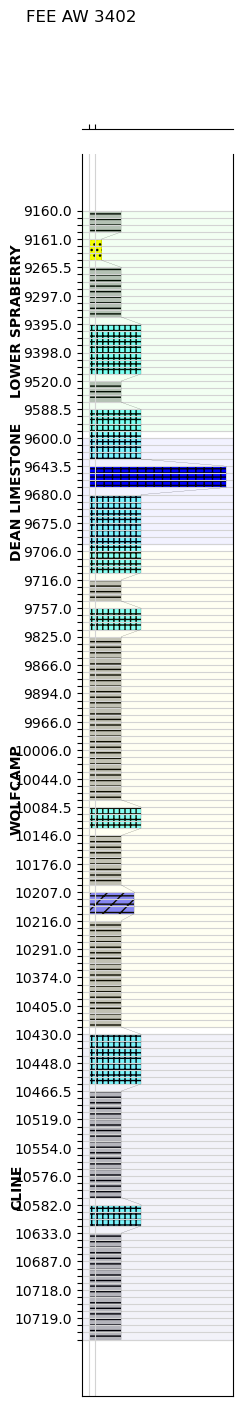

In [1277]:
makeplot4(  main2(AW3402, 4 )   )

In [1545]:

def types_(BI307):
    

    create(BI307)

    
    def addlabels(x,y):
        y = list(y)
        for i in range(len(x)):
            plt.text(i,y[i],y[i])

    fig, ax = plt.subplots(figsize=(20,25))

    ax1 = plt.subplot2grid((1,9), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,9), (0,1), rowspan=1, colspan = 1)
    ax3 = plt.subplot2grid((1,9), (0,2), rowspan=1, colspan = 1)
    ax4 = plt.subplot2grid((1,9), (0,3), rowspan=1, colspan = 1)
    ax5 = plt.subplot2grid((1,9), (0,4), rowspan=1, colspan = 1)




## TOC
    ax1.scatter("TOC", "DEPTH", data = BI307, color = "red")
    ax1.set_xlabel("TOC", fontsize= 7)
    ax1.xaxis.label.set_color("red")
    ax1.set_xlim(0, 15)
    ax1.set_ylabel("DEPTH (ft)")
    ax1.tick_params(axis='x', colors="red")
    ax1.spines["top"].set_edgecolor("red")
    ax1.title.set_color('green')
#ax1.invert_yaxis()
   
## S1   	Kerogen Conversion and Maturity	
    #ax2.barh("Pseudo Van Krevelen Plot_NUM", "DEPTH", data = BI307, color = "red")
    ax2.barh(BI307["DEPTH"], BI307["Pseudo Van Krevelen Plot_NUM"],align='center')
    ax2.set_xlabel("Pseudo Van Krevelen Plot", fontsize= 7)
    #ax2.barh(BI307["DEPTH"], width=70)


    l2 =  list( BI307["Pseudo Van Krevelen Plot_NUM"].dropna().unique( )  )  
    print(l2)
    mi = min( l2   )
    mx = max( l2 )
    #ax2.set_xlim( mi, mx  + 1)

    ax2.xaxis.label.set_color("red")
    
    ax2.tick_params(axis='x', colors="red")
    ax2.spines["top"].set_edgecolor("red")
#ax2.invert_yaxis() 

    #addlabels(create(BI307)[0], BI307["DEPTH"] ) 

## S2
    ax3.scatter("Kerogen Quality Plot_NUM", "DEPTH", data = BI307, color = "black")
    ax3.set_xlabel("Kerogen Quality Plot", fontsize= 7)
    l3 =  list( BI307["Kerogen Quality Plot_NUM"].dropna().unique( )  )  
    print(l3)
    mi = min( l3   )
    mx = max( l3 )
    ax3.set_xlim(mi, mx+1)
    #ax3.set_xlim(mi, mx-1)
    #ax3.set_xlim(mi-1, mx-1)  # <<<<<<,
    ax3.xaxis.label.set_color("black")
    ax3.tick_params(axis='x', colors="black")
    ax3.spines["top"].set_edgecolor("black")
#ax3.invert_yaxis()

## S3
    ax4.scatter("Kerogen Type and Maturity_NUM", "DEPTH", data = BI307, color = "purple")
    ax4.set_xlabel("Kerogen Type and Maturity", fontsize= 7)
    l4 =  list( BI307["Kerogen Type and Maturity_NUM"].dropna().unique( )  )  
    print(l4)
    mi = min( l4   )
    mx = max( l4 )
    ax4.set_xlim(mi, mx+1)
#ax4.set_xlim(0,1)
    ax4.xaxis.label.set_color("purple")
    ax4.tick_params(axis='x', colors="purple")
    ax4.spines["top"].set_edgecolor("purple")
#ax4.invert_yaxis()
 
## S2/S3
    ax5.scatter("Kerogen Conversion and Maturity_NUM", "DEPTH", data = BI307 ,color = "blue")
    ax5.set_xlabel("Kerogen Conversion and Maturity", fontsize= 7)
    l5 =  list( BI307["Kerogen Conversion and Maturity_NUM"].dropna().unique( )  ) 
    print(l5)
    mi = min( l5  )
    mx = max( l5 )
    #ax5.set_xlim(mi, mx+1)
    ax5.set_xlim(mi, mx)
    ax5.xaxis.label.set_color("blue")
    ax5.tick_params(axis='x', colors="blue")
    ax5.spines["top"].set_edgecolor("blue")
#ax5.invert_yaxis()
   
       
    for ax in [ax1, ax2, ax3, ax4, ax5]:    
    #ax.set_ylim(8040.5 , 11200.0)## 10850.0)
        LEN =  list( BI307["DEPTH"].dropna().unique( )  )
        mnn = min( LEN )
        mxx = max( LEN )
        ax.set_ylim(mnn , mxx)## 10850.0)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.yaxis.set_ticks_position("left")
        ax.yaxis.set_label_position("left")
        ax.spines["top"].set_position(("axes", 1.02))
        ax.invert_yaxis() 
    
    
    
    for ax in [ax2, ax3, ax4, ax5]:
        plt.setp(ax.get_yticklabels(), visible = False)
        #plt.setp(ax.get_xticklabels(), visible = False)
        
#ax2.set_xticks(BI307["Pseudo Van Krevelen Plot_NUM"])

    l1 = []
    for i in list(BI307["Pseudo Van Krevelen Plot_NUM"].dropna().unique( )):
        l1.append( [ create(BI307)[0][i] ,   i  ]  )
    l1.sort(key=lambda e: e[1])

    l11 = [   row[0]  for row in l1   ]
    l111 = [   row[1]  for row in l1   ]
    print(l11, l111,"here")
    
    #em = ['']
    #l11 = em +  l11

    print(create(BI307)[0])
    lk = ['TYPE I KEROGEN Oil Prone','TYPE II KEROGEN Oil Prone', 'Mixed Type II/III KEROGEN', 'TYPE III KEROGEN Gas Prone']
    
    ax2.set_xticklabels(  l11 ,  fontsize= 5.2 , fontweight='bold', rotation=10 ) #, fontweight='bold')
    #ax2.set_xlim( min(l1), max(l1)+1  )
    
    
    ax3.set_xticklabels(   create(BI307)[1], fontsize= 5.4  , fontweight='bold', rotation=10)
    ax4.set_xticklabels(   create(BI307)[2], fontsize= 5.41  , fontweight='bold', rotation=10 )
    ax5.set_xticklabels(   create(BI307)[3], fontsize= 5.23 , fontweight='bold' )
    
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.45)

[3.0, 4.0]
[3.0, 4.0]
[1.0, 2.0, 3.0]
[1.0]


/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/1752913510.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(   create(BI307)[0],  fontsize= 5.2 , fontweight='bold', rotation=10 ) #, fontweight='bold')
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/1752913510.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(   create(BI307)[1], fontsize= 5.4  , fontweight='bold', rotation=10)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/1752913510.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(   create(BI307)[2], fontsize= 5.41  , fontweight='bold', rotation=10 )
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/1752913510.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(   create(BI307)[3], fontsize= 5.23 , fontwei

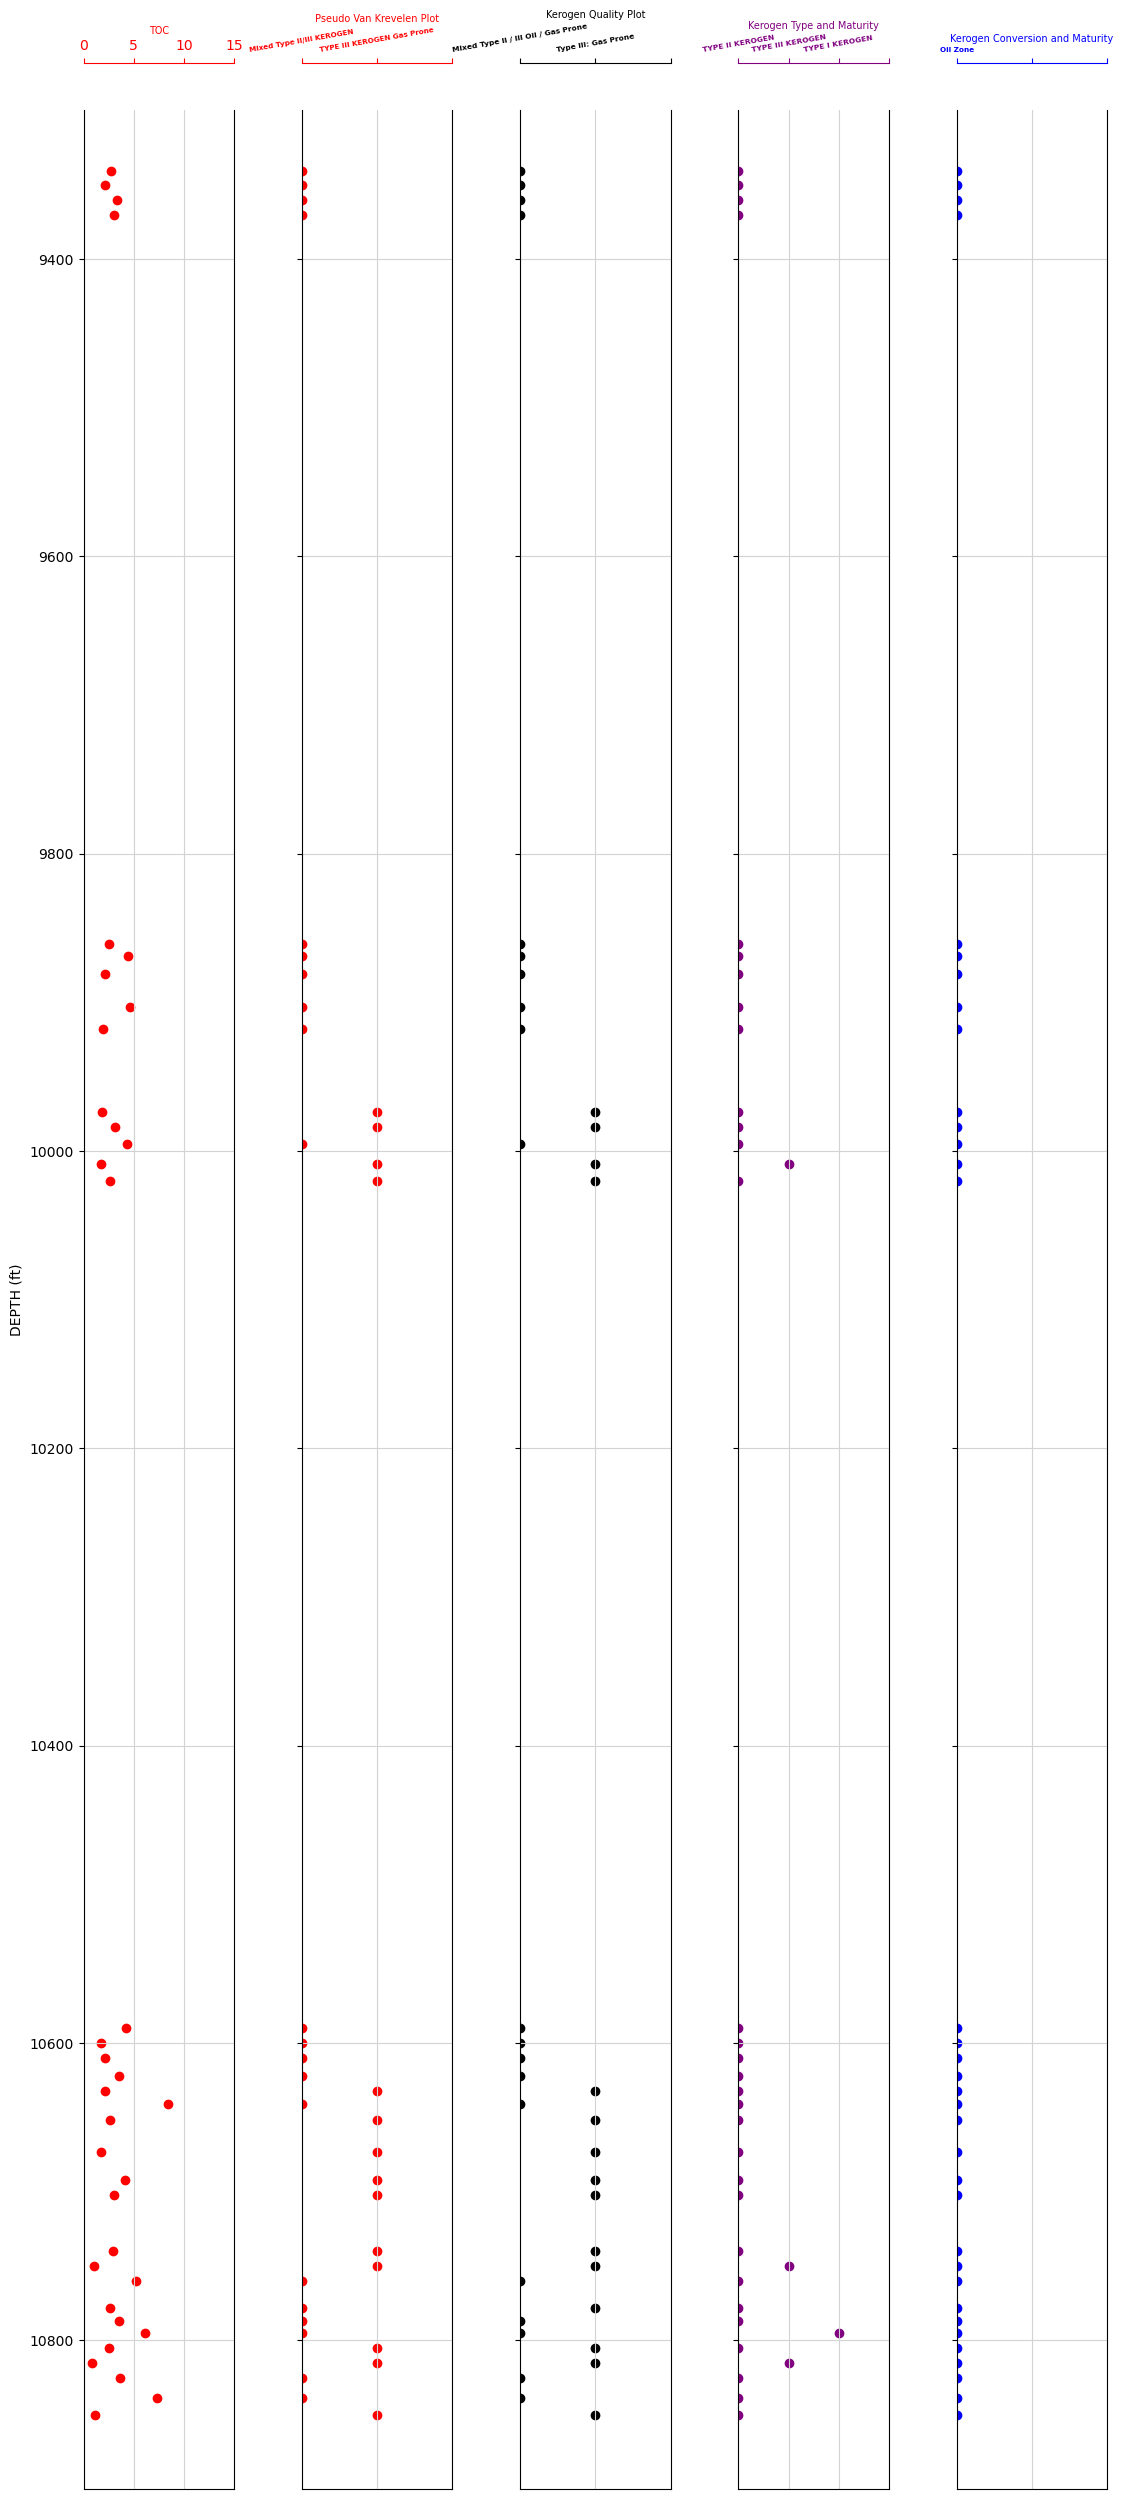

In [1360]:
types_(AL910)

[4.0, 3.0]
[4.0, 3.0]
[1.0, 2.0, 3.0]
[1.0, 2.0]


/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/3727834878.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(   create(BI307)[0][::-1],  fontsize= 5.2 , fontweight='bold', rotation=10 ) #, fontweight='bold')
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/3727834878.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(   create(BI307)[1][::-1], fontsize= 5.4  , fontweight='bold', rotation=10)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/3727834878.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(   create(BI307)[2], fontsize= 5.41  , fontweight='bold', rotation=10 )
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/3727834878.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(   create(BI307)[3], fontsize= 5.

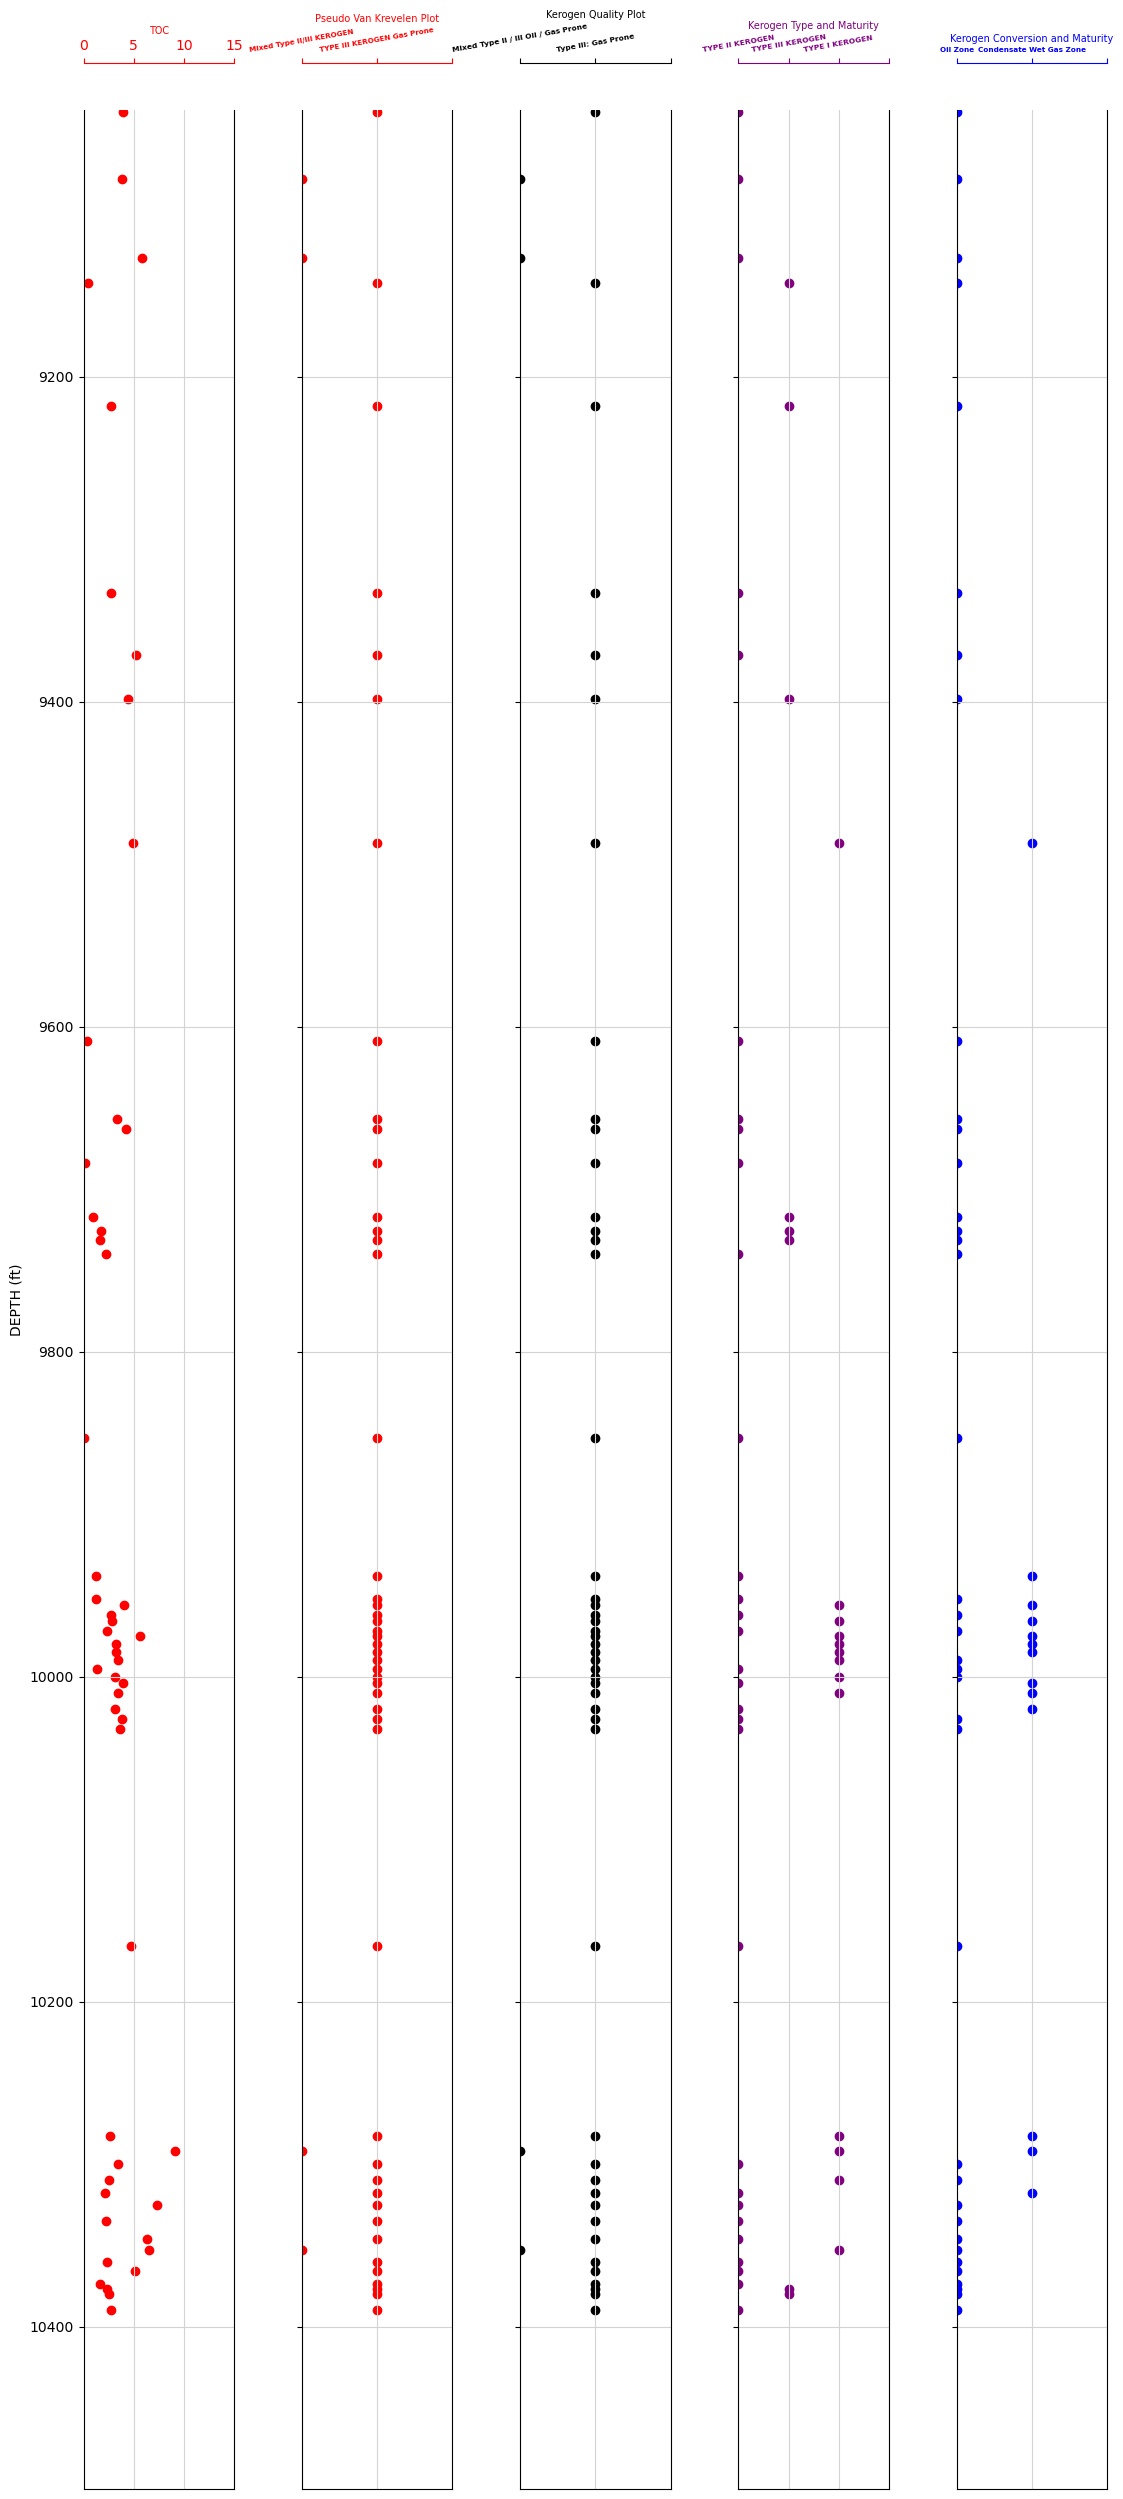

In [1362]:
types_(BI307)

[2.0, 3.0]
[3.0, 2.0, 4.0]
[1.0, 2.0]
[0.0, 3.0]
['Mixed Type II/III KEROGEN', 'TYPE III KEROGEN Gas Prone'] [2.0, 3.0] here
{0: 'TYPE I KEROGEN Oil Prone', 1: 'TYPE II KEROGEN Oil Prone', 2: 'Mixed Type II/III KEROGEN', 3: 'TYPE III KEROGEN Gas Prone'}


/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/2697442351.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(  l11 ,  fontsize= 5.2 , fontweight='bold', rotation=10 ) #, fontweight='bold')
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/2697442351.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(   create(BI307)[1], fontsize= 5.4  , fontweight='bold', rotation=10)
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/2697442351.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(   create(BI307)[2], fontsize= 5.41  , fontweight='bold', rotation=10 )
/var/folders/50/ghq6__zs6xnch24v7kvn00xr0000gn/T/ipykernel_1147/2697442351.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(   create(BI307)[3], fontsize= 5.23 , fontweight='bold' )


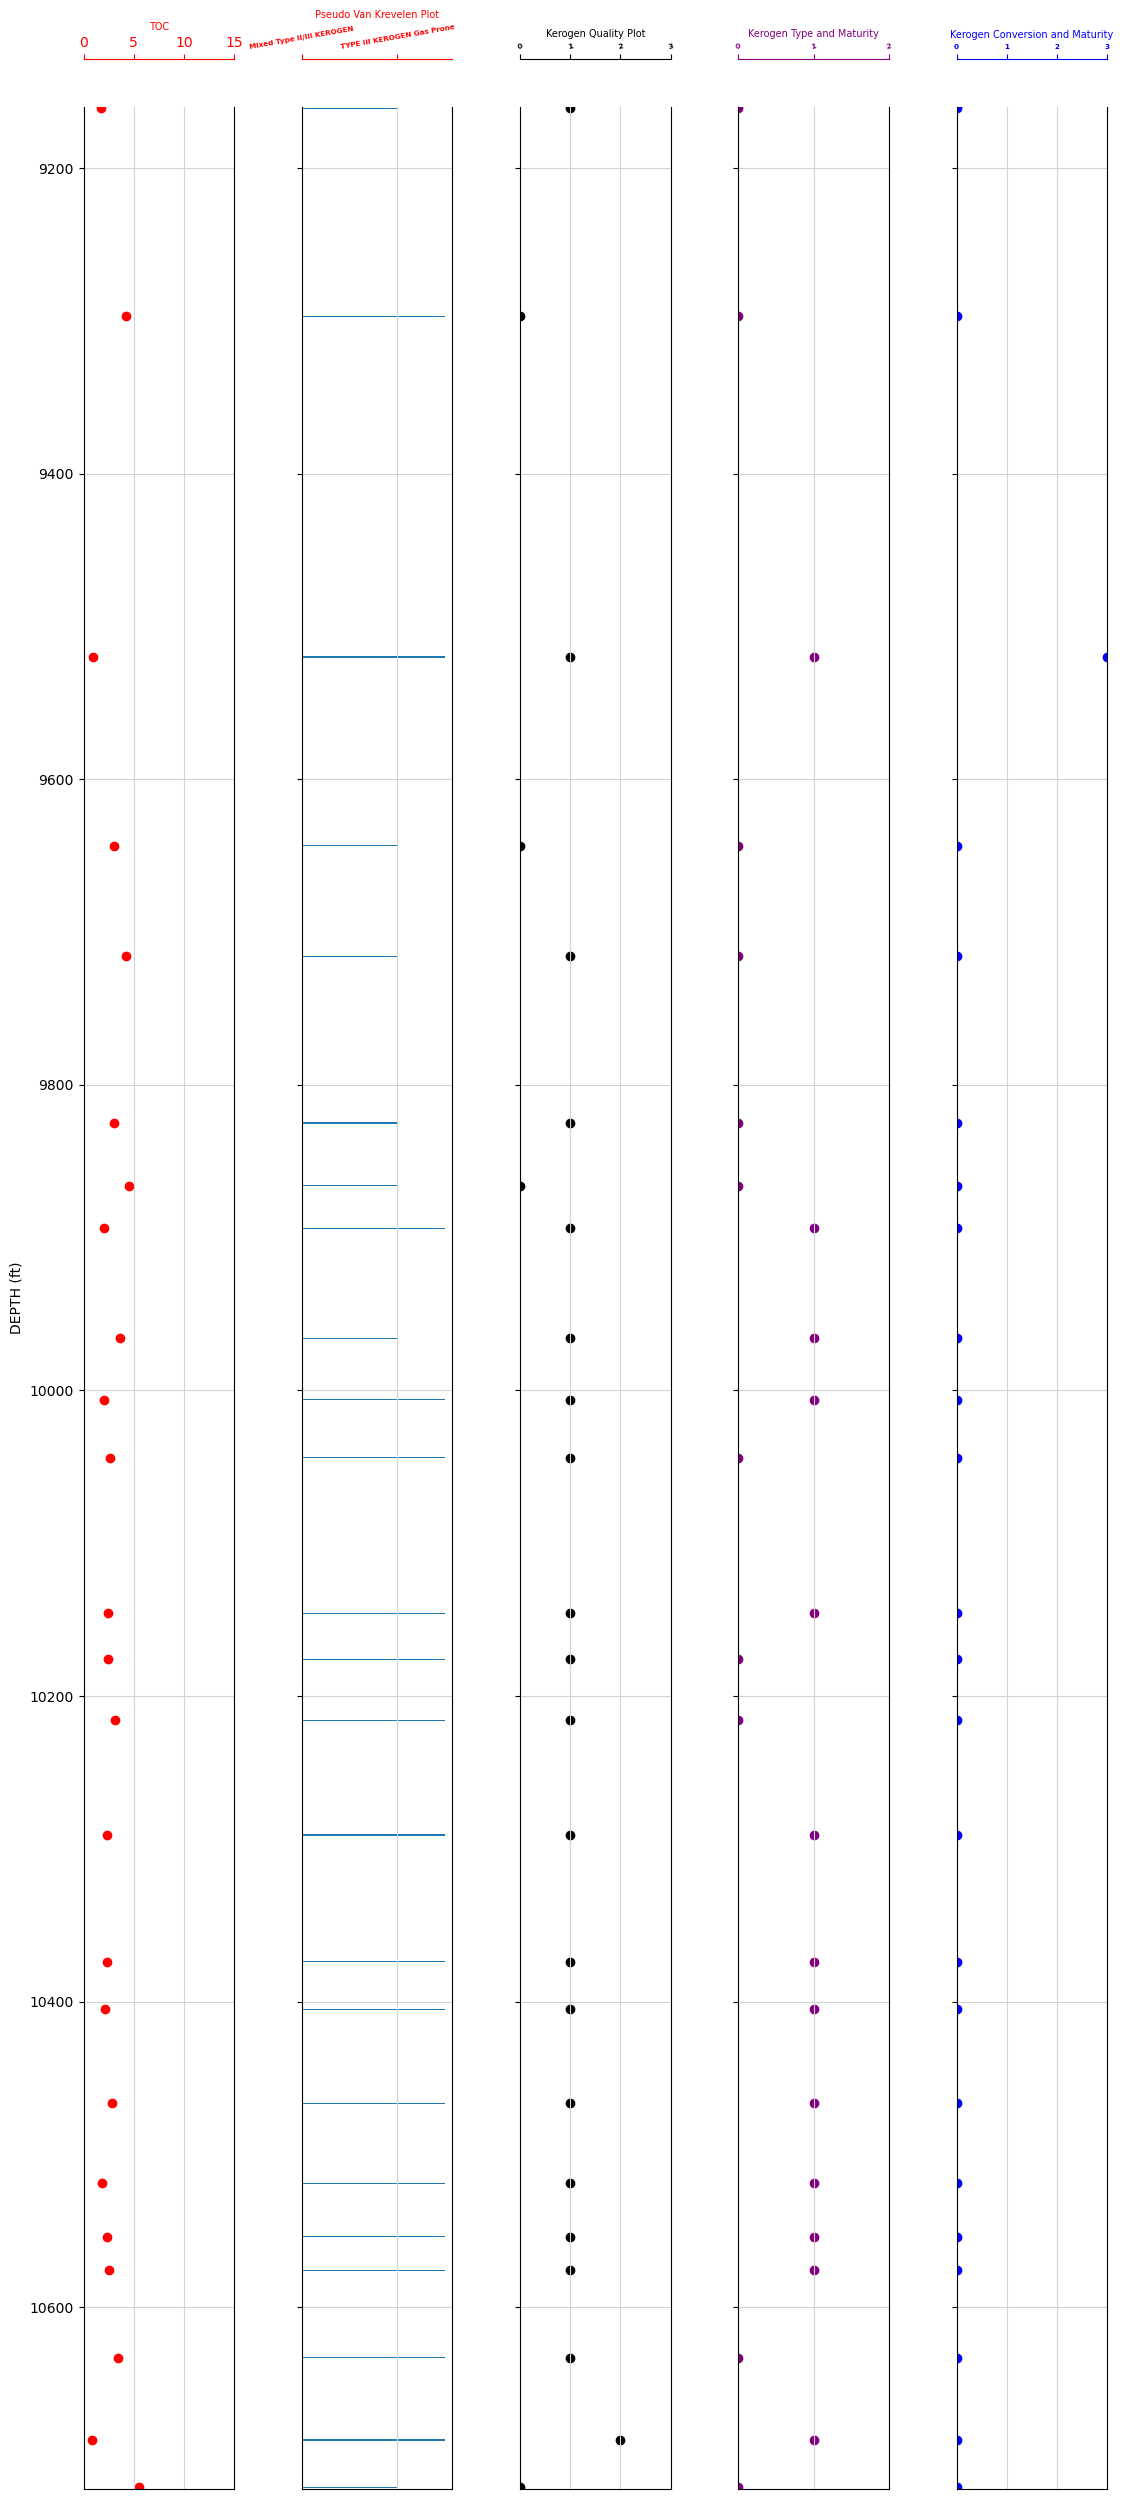

In [1546]:
types_(AW3402)

In [1544]:
def create(NEW_FEE_AL_910_KEROGEN):
    
    
    def red(   BI307, graph44 ):

        #graph44 = {"TYPE I KEROGEN Oil Prone" : 1 ,    "TYPE II KEROGEN Oil Prone" : 2  , 
        #"Mixed Type II/III KEROGEN" : 3  , 
        #"TYPE III KEROGEN Gas Prone" : 4  }

        l = list( BI307.dropna().unique( )  )
#l2 = [ [0] * 2 for i in range( len(l) ) ]
        l2  = []

    #print(l)


        for i in range( len(l)  ) :
            l2.append([ l[i] ,  graph44[ l[i] ]] )
#print(l2)
        #for k, v in graph44:
            #l2.append(   [k, v] )
        
    
        l2.sort(key=lambda e: e[1])

        l2 = [   row[0]  for row in l2   ]

        return l
    
    
    
    graph11 = { "Oil Zone" : 0 , "Condensate Wet Gas Zone" : 1 ,
        "Dry Gas Zone" : 2 ,  "Immature" : 3  }   # priority
    
    
    g11 = { 0 : "Oil Zone" , 1 : "Condensate Wet Gas Zone" ,
       2 :  "Dry Gas Zone" , 3 : "Immature"  }   # priority
        
    NEW_FEE_AL_910_KEROGEN["Kerogen Conversion and Maturity_NUM"]  =   NEW_FEE_AL_910_KEROGEN["Kerogen Conversion and Maturity"].dropna().map(graph11) 

##################
        # VVVVVV
    graph22 = { "TYPE I KEROGEN" : 0 ,  "TYPE II KEROGEN" : 1 ,  "TYPE III KEROGEN" :  2   } #  priority
        #.  3>2.   1>3.   2>1. 
        
    g22 = { 0 : "TYPE I KEROGEN"  , 1 :  "TYPE II KEROGEN"  , 2 :  "TYPE III KEROGEN"    }
    
      
    NEW_FEE_AL_910_KEROGEN["Kerogen Type and Maturity_NUM"] = NEW_FEE_AL_910_KEROGEN["Kerogen Type and Maturity"].dropna().map(graph22)
################
        
    graph33 = { "Type I: Oil Prone Usually Lacustrine"  : 0,      "Type II: Oil Prone Usually Marine" : 1 ,
            "Mixed Type II / III Oil / Gas Prone" : 2 , "Type III: Gas Prone" : 3 ,  "Dry Gas Prone" : 4  } # priority
        ##. 3>5.         5> 3
        
    g33 = { 0:"Type I: Oil Prone Usually Lacustrine"  , 1: "Type II: Oil Prone Usually Marine" ,
            2 : "Mixed Type II / III Oil / Gas Prone" , 3 : "Type III: Gas Prone"  , 4 :  "Dry Gas Prone"   }
      
    NEW_FEE_AL_910_KEROGEN["Kerogen Quality Plot_NUM"] = NEW_FEE_AL_910_KEROGEN["Kerogen Quality Plot"].dropna().map(graph33)
###############
      
    graph44 = {"TYPE I KEROGEN Oil Prone" : 0 ,    "TYPE II KEROGEN Oil Prone" : 1  , 
        "Mixed Type II/III KEROGEN" : 2  , 
        "TYPE III KEROGEN Gas Prone" : 3  } # priority
    
    g44 = {0:"TYPE I KEROGEN Oil Prone" ,  1: "TYPE II KEROGEN Oil Prone" , 
        2: "Mixed Type II/III KEROGEN" , 
        3 : "TYPE III KEROGEN Gas Prone" }

    #.  list( NEW_FEE_AL_910_KEROGEN["Pseudo Van Krevelen Plot"].unique()  )
        
    NEW_FEE_AL_910_KEROGEN["Pseudo Van Krevelen Plot_NUM"] =  NEW_FEE_AL_910_KEROGEN["Pseudo Van Krevelen Plot"].dropna().map(graph44)
    
    #return   red(   NEW_FEE_AL_910_KEROGEN["Pseudo Van Krevelen Plot"], graph44 )   ,  red(   NEW_FEE_AL_910_KEROGEN["Kerogen Quality Plot"], graph33 )  ,  red(   NEW_FEE_AL_910_KEROGEN["Kerogen Type and Maturity"], graph22 ) , red(   NEW_FEE_AL_910_KEROGEN["Kerogen Conversion and Maturity"], graph11 )    
    
    return g44, g33, g22, g11

In [1019]:
graph44 = {"TYPE I KEROGEN Oil Prone" : 1 ,    "TYPE II KEROGEN Oil Prone" : 2  , 
        "Mixed Type II/III KEROGEN" : 3  , 
        "TYPE III KEROGEN Gas Prone" : 4  }

l = list( BI307["Pseudo Van Krevelen Plot"].dropna().unique( )  )
#l2 = [ [0] * 2 for i in range( len(l) ) ]
l2  = []

print(l)


for i in range( len(l)  ) :
    l2.append([ l[i] ,  graph44[ l[i] ]] )
#print(l2)
  
    
l2.sort(key=lambda e: e[1])

l2 = [   row[0]  for row in l2   ]

l2

['TYPE III KEROGEN Gas Prone', 'Mixed Type II/III KEROGEN']


['Mixed Type II/III KEROGEN', 'TYPE III KEROGEN Gas Prone']

In [1203]:

#def red(   BI307, graph44 ):

    #graph44 = {"TYPE I KEROGEN Oil Prone" : 1 ,    "TYPE II KEROGEN Oil Prone" : 2  , 
        #"Mixed Type II/III KEROGEN" : 3  , 
        #"TYPE III KEROGEN Gas Prone" : 4  }

    #l = list( BI307.dropna().unique( )  )
#######l2 = [ [0] * 2 for i in range( len(l) ) ]
    #l2  = []

    ##########print(l)


    #for i in range( len(l)  ) :
        #l2.append([ l[i] ,  graph44[ l[i] ]] )
###########print(l2)
  
    
    #l2.sort(key=lambda e: e[1])

    #l2 = [   row[0]  for row in l2   ]

    #return l2

In [1479]:
AW3402["Pseudo Van Krevelen Plot"].dropna()

0                            NaN
1      Mixed Type II/III KEROGEN
2                            NaN
3     TYPE III KEROGEN Gas Prone
4                            NaN
5                            NaN
6     TYPE III KEROGEN Gas Prone
7                            NaN
8                            NaN
9      Mixed Type II/III KEROGEN
10                           NaN
11                           NaN
12                           NaN
13     Mixed Type II/III KEROGEN
14                           NaN
15     Mixed Type II/III KEROGEN
16     Mixed Type II/III KEROGEN
17    TYPE III KEROGEN Gas Prone
18     Mixed Type II/III KEROGEN
19    TYPE III KEROGEN Gas Prone
20    TYPE III KEROGEN Gas Prone
21                           NaN
22    TYPE III KEROGEN Gas Prone
23    TYPE III KEROGEN Gas Prone
24                           NaN
25    TYPE III KEROGEN Gas Prone
26    TYPE III KEROGEN Gas Prone
27    TYPE III KEROGEN Gas Prone
28    TYPE III KEROGEN Gas Prone
29                           NaN
30        

In [1476]:
[i  for i in AW3402["Pseudo Van Krevelen Plot"]    ]
   

[nan,
 'Mixed Type II/III KEROGEN',
 nan,
 'TYPE III KEROGEN Gas Prone',
 nan,
 nan,
 'TYPE III KEROGEN Gas Prone',
 nan,
 nan,
 'Mixed Type II/III KEROGEN',
 nan,
 nan,
 nan,
 'Mixed Type II/III KEROGEN',
 nan,
 'Mixed Type II/III KEROGEN',
 'Mixed Type II/III KEROGEN',
 'TYPE III KEROGEN Gas Prone',
 'Mixed Type II/III KEROGEN',
 'TYPE III KEROGEN Gas Prone',
 'TYPE III KEROGEN Gas Prone',
 nan,
 'TYPE III KEROGEN Gas Prone',
 'TYPE III KEROGEN Gas Prone',
 nan,
 'TYPE III KEROGEN Gas Prone',
 'TYPE III KEROGEN Gas Prone',
 'TYPE III KEROGEN Gas Prone',
 'TYPE III KEROGEN Gas Prone',
 nan,
 nan,
 'TYPE III KEROGEN Gas Prone',
 'TYPE III KEROGEN Gas Prone',
 'TYPE III KEROGEN Gas Prone',
 'TYPE III KEROGEN Gas Prone',
 nan,
 'TYPE III KEROGEN Gas Prone',
 'TYPE III KEROGEN Gas Prone',
 'Mixed Type II/III KEROGEN',
 nan]

In [8]:
import pandas as pd

In [9]:
data = {('        Kerogen Conversion and Maturity : Oil Zone', '        Kerogen Type and Maturity : TYPE I KEROGEN', '        Kerogen Quality Plot : Mixed Type II / III Oil / Gas Prone', '        Pseudo Van Krevelen Plot : Mixed Type II/III KEROGEN'): "   1  12.5%  ['10353.5']", ('        Kerogen Conversion and Maturity : Oil Zone', '        Kerogen Type and Maturity : TYPE II KEROGEN', '        Kerogen Quality Plot : Type III: Gas Prone', '        Pseudo Van Krevelen Plot : TYPE III KEROGEN Gas Prone'): "   5  62.5%  ['10346.5', '10360.5', '10366.5', '10374.0', '10390.5']", ('        Kerogen Conversion and Maturity : Oil Zone', '        Kerogen Type and Maturity : TYPE III KEROGEN', '        Kerogen Quality Plot : Type III: Gas Prone', '        Pseudo Van Krevelen Plot : TYPE III KEROGEN Gas Prone'): "   2  25.0%  ['10377.0', '10380.5']"}

In [10]:
pd.DataFrame.from_dict(data , orient='index')

,0
"( Kerogen Conversion and Maturity : Oil Zone, Kerogen Type and Maturity : TYPE I KEROGEN, Kerogen Quality Plot : Mixed Type II / III Oil / Gas Prone, Pseudo Van Krevelen Plot : Mixed Type II/III KEROGEN)",1 12.5% ['10353.5']
"( Kerogen Conversion and Maturity : Oil Zone, Kerogen Type and Maturity : TYPE II KEROGEN, Kerogen Quality Plot : Type III: Gas Prone, Pseudo Van Krevelen Plot : TYPE III KEROGEN Gas Prone)","5 62.5% ['10346.5', '10360.5', '10366.5',..."
"( Kerogen Conversion and Maturity : Oil Zone, Kerogen Type and Maturity : TYPE III KEROGEN, Kerogen Quality Plot : Type III: Gas Prone, Pseudo Van Krevelen Plot : TYPE III KEROGEN Gas Prone)","2 25.0% ['10377.0', '10380.5']"
